#  ...............................Machine Learning Group Assignment..............................
## Team: Rakshaykumar, Akshath K R, Prerit Sharma
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# The assignment is segmented in listed section:
- Business problem defination and understanding
- Data Understanding
- Exploratory Data Analysis
- Data Preparation for Model Building
- Model Building
- Model Evalution
- Summary and recommendation

## Section : 1 
###  Problem Statement: 
- An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.


- Build a machine learning model for the X Education to categorised the customer with lead score to get the maximum conversion rate. The target to achieve a ballpark of the target lead conversion rate to be around 80%.


- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Section : 2 
###  Data Understanding: 

In [1]:
# Importing the required libraries and dataset
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score,precision_recall_curve
import sklearn.metrics as metrics
df = pd.read_csv(r'D:\MS\Machine Learning\Group Assignment\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')

In [2]:
# Set option selected for maximum view of coulmns and rows
pd.set_option("display.max_rows", 3000000)
pd.set_option("display.max_columns",100)

In [3]:
# review the head of dataset
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Review the columns of data set
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
# View the shape of data set
print(df.shape)

(9240, 37)


In [6]:
# Checking the % null values in dataset 
df.isnull().sum()/df.shape[0]*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [7]:
# The column having more than 40% null value to be drop. 
# drop_list create to get the columns with having more the 40% null values
drop_list = [column for column in df.columns if df[column].isnull().sum()/(df.shape[0])*100 > 40]
# for column in df.columns:
#     if df[column].isnull().sum()/df.shape[0]*100 > 40:
#         drop_list.append(column)
print(drop_list)
print("Total columns with 40% Null Values=",len(drop_list))

['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
Total columns with 40% Null Values= 5


In [8]:
# Dropping the columns with 40% > null values
df = df.drop(columns=drop_list,axis=1)

In [9]:
df.shape

(9240, 32)

In [10]:
# Rechecking the null values
df.isnull().sum()/df.shape[0]*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Observations:

- The Dataset contains 9270 rows and 37 columns


- The Dataset contains numerical and categorical columns


- Some columns have null values which are to be handled during EDA


- The "Prospect ID" and "Lean Number" columns are not significants and to be drop during EDA 

## Section : 3 
###  Exploratory Data Anaysis: 

In [13]:
# Rechecking the shape 
df.shape

(9240, 32)

In [14]:
# Checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Observation: 

There are continous and categorical columns in dataset which needs to be segregate for further analysis. 

In [15]:
# Segregate the continous and catogorical columns 
# Taking the dtype as filter for segregation
categorical_columns = []
numerical_columns = []
for i in df.columns:
    if df[i].dtype == 'O':
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)
print("Categorical Column =",categorical_columns)
print("")
print("Total Categorical Columns = ", len(categorical_columns))
print("_"*125)
print("Numerical Columns =",numerical_columns)
print("")
print("Total Numerical Columns = ", len(numerical_columns))
        

Categorical Column = ['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']

Total Categorical Columns =  27
_____________________________________________________________________________________________________________________________
Numerical Columns = ['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

Total Numerical Columns =  5


In [16]:
# checking the null value % and statistical values by describe
display(df[numerical_columns].isnull().sum()/df.shape[0]*100)
df[numerical_columns].describe()

Lead Number                    0.000000
Converted                      0.000000
TotalVisits                    1.482684
Total Time Spent on Website    0.000000
Page Views Per Visit           1.482684
dtype: float64

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


#### Observation:

- The column "TotalVisits" and "Page Views Per Visit" mean and median values are very closeby. 


- So null value can be replaced by either of mean or median hence we are replacing it by it's mean for further analysis.

In [17]:
df["TotalVisits"] = df["TotalVisits"].fillna(df["TotalVisits"].mean())
df["Page Views Per Visit"] = df["Page Views Per Visit"].fillna(df["Page Views Per Visit"].mean())

In [18]:
# Rechecking the null values after replacement
display(df[numerical_columns].isnull().sum()/df.shape[0]*100)

Lead Number                    0.0
Converted                      0.0
TotalVisits                    0.0
Total Time Spent on Website    0.0
Page Views Per Visit           0.0
dtype: float64

In [19]:
# Checking the null values in Categorical columns
df[categorical_columns].isnull().sum()/df.shape[0]*100

Prospect ID                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.000000
Digital Advertisement                             0.0000

In [20]:
# Checking the unique variables and counts of each categorical columns 
for i in categorical_columns:
    print("Column Name =",i)
    if i in (["Prospect ID","Lead Origin"]):
        pass
    else:
        print(df[i].value_counts())
        print()
        print("Mode = ",df[i].mode()[0])
        print()
        print("*"*125)

Column Name = Prospect ID
Column Name = Lead Origin
Column Name = Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Mode =  Google

*****************************************************************************************************************************
Column Name = Do Not Email
No     8506
Yes     734
Name: Do Not Email, dtype: int64

Mode =  No

********************************************************************************************************

#### Observation:

- The column "Lead Source" and "Last Activity" null values replaced by it's mode for further analysis.

In [21]:
# Imputing the null values by the mode values since the %null value is less than 4%
df["Lead Source"] = df["Lead Source"].fillna(df["Lead Source"].mode()[0])
df["Last Activity"] = df["Last Activity"].fillna(df["Last Activity"].mode()[0])

In [22]:
# Rechecking the null values of categorical columns after replacing the mode values
df[categorical_columns].isnull().sum()/df.shape[0]*100

Prospect ID                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Last Activity                                     0.000000
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.000000
Digital Advertisement                             0.0000

#### Observation: 
- Since the "Country" column having 26.63% null values, checking the "Country" columns varaibles

In [23]:
# Checking the "Country" column
print("Count of variable India and null values = ",df[df["Country"] == "India"]["Country"].count() + df["Country"].isnull().sum())
print("% values of India and null values =", (df[df["Country"] == "India"]["Country"].count() + df["Country"].isnull().sum())/df.shape[0]*100)

Count of variable India and null values =  8953
% values of India and null values = 96.8939393939394


#### Observation: 

- The variable India and Null values are approximate to 97% of total rows hence we decide to drop the Country column.

In [24]:
print(df["Specialization"].value_counts()/df.shape[0]*100)
print(df["How did you hear about X Education"].value_counts()/df.shape[0]*100)

Select                               21.017316
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64
Select                   54.577922
Online Search             8.744589


#### Observation:

- The columns "Specialization" & "How did you hear about X Education" has a "Select" variable with 21% & 54% weighted. The "select" variable is completely different from other variables. Considering the variable "Select" and importance of columns, we decided to replace the "Select" variable with "Not declared" in "Specialization" and "Unknown" in "How did you hear about X Education". 


- The null values in "Specialization" and "How did you hear about X Education" are replaced with Mode values. 

In [25]:
# The select is replced as not_declared
df["Specialization"] = df["Specialization"].replace("Select","Not_declared")
df["How did you hear about X Education"] = df["How did you hear about X Education"].replace("Select","Unknown")

In [26]:
# The null values inputed as mode of column
df["Specialization"] = df["Specialization"].fillna(df["Specialization"].mode()[0])
df["How did you hear about X Education"] = df["How did you hear about X Education"].fillna(df["How did you hear about X Education"].mode()[0])

In [27]:
# Checking the values counts in Specializaions
df["Specialization"].value_counts()

Not_declared                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [28]:
# Checking the values counts in How did you hear about X Education
df["How did you hear about X Education"].value_counts()

Unknown                  7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [29]:
# working with How did you hear about X Education column
print(df["How did you hear about X Education"].value_counts()/df.shape[0]*100)
print("-"*125)
print(df["How did you hear about X Education"].isnull().sum()/df.shape[0]*100)

Unknown                  78.463203
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: How did you hear about X Education, dtype: float64
-----------------------------------------------------------------------------------------------------------------------------
0.0


#### Observation: 
- There are No null values in "How did you hear about X Education".

In [30]:
# Checking the null values againg in Dataset 
df[categorical_columns].isnull().sum()/df.shape[0]*100

Prospect ID                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Last Activity                                     0.000000
Country                                          26.634199
Specialization                                    0.000000
How did you hear about X Education                0.000000
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.000000
Digital Advertisement                             0.0000

In [31]:
df["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [32]:
df["What is your current occupation"] = df["What is your current occupation"].fillna("Other")

#### Observations:

- The column "What is your current occupation" has 29.11% null values which are replaced by "Other" variable

In [33]:
# Checking the variable counts in column What is your current occupation.
df["What is your current occupation"].value_counts()

Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### Observation:
- The count of "Housewife" and "Businessman" are not significantly high which are pushed to the variable "Others" and "Working Professional" respectevely.

In [34]:
df["What is your current occupation"] = df["What is your current occupation"].replace("Housewife", "Other")
df["What is your current occupation"] = df["What is your current occupation"].replace("Businessman", "Working Professional")

In [35]:
# Checking the variable counts in "What is your current occupation" afer replacement of variables
df["What is your current occupation"].value_counts()

Unemployed              5600
Other                   2716
Working Professional     714
Student                  210
Name: What is your current occupation, dtype: int64

In [36]:
# Checking the variable count in column "What matters most to you in choosing a course"
df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [37]:
# Checking the variable count in column "Tags"
df["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [38]:
# Checking the variable count in column "Lead Profile"
df["Lead Profile"].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

#### Observations:
- The columns 'Do Not Call','Tags','Update me on Supply Chain Content','Lead Profile', 'City','Get updates on DM Content','What matters most to you in choosing a course', 'Search', 'Magazine','Newspaper Article','X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses', 'I agree to pay the amount through cheque','Country' are not significant and does not provide sufficient information for problem statement, hense decided to drop the list of columns.

In [39]:
drop_list_2 = ['Do Not Call','Tags','Update me on Supply Chain Content','Lead Profile', 'City','Get updates on DM Content',
              'What matters most to you in choosing a course', 'Search', 'Magazine','Newspaper Article',
              'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
              'Receive More Updates About Our Courses', 'I agree to pay the amount through cheque','Country']

In [40]:
# Dropping the columns from dataset 
df = df.drop(columns=drop_list_2,axis=1)

In [41]:
# Checking the shape of dataset after dropping the columms
df.shape

(9240, 15)

In [42]:
# Checking the null values again in dataset
df.isnull().sum()/df.shape[0]*100

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
How did you hear about X Education        0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

#### Observations:
- After droping the less significant columns, the shape of the dataset is 9240 rows and 13 columns


- There is no null values now in dataset.

# Univariate and Bivariate Analysis 

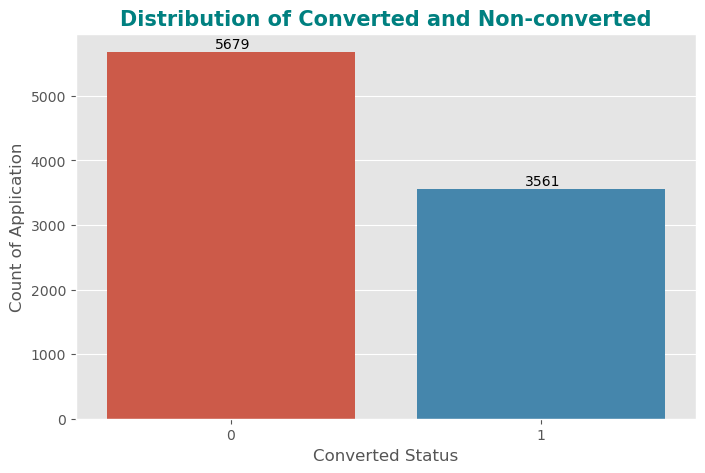

In [43]:
# Target variable "Converted" distribition 
plt.figure(figsize=(8,5))
plt.style.use("ggplot")
ax = sns.countplot(x="Converted", data=df)
plt.title('Distribution of Converted and Non-converted',fontdict={"fontsize":15, "fontweight":"bold"},color="teal")
plt.xlabel('Converted Status')
plt.ylabel('Count of Application')

for i in ax.patches:
        ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.35, i.get_height()+50))

In [44]:
Converted_rate = df["Converted"].sum()/df["Converted"].count()
print(f"Converted_rate = {round(Converted_rate,2)*100} %")

Converted_rate = 39.0 %


#### Observation: 
- Out of 9270 application, 3561 are conveted which leaves ~39% Converted rate.  

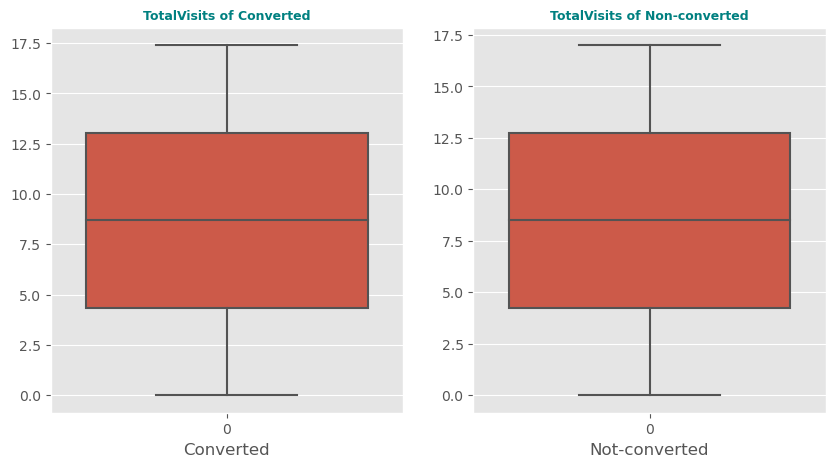

In [45]:
# Distribution of the variables in the column "TotalVisits" 
plt.figure(figsize=(10,5))
df_time_1 = df["TotalVisits"].where(df["Converted"]==1)
df_time_0 = df["TotalVisits"].where(df["Converted"]==0)
plt.subplot(1,2,1)
sns.boxplot(data=df_time_1.quantile([0,0.99]))
plt.title("TotalVisits of Converted",fontdict={"fontsize":9, "fontweight":"bold"},color="teal")
plt.xlabel("Converted")
plt.subplot(1,2,2)
sns.boxplot(data=df_time_0.quantile([0,0.99]))
plt.title("TotalVisits of Non-converted",fontdict={"fontsize":9, "fontweight":"bold"},color="teal")
plt.xlabel("Not-converted")
plt.show()

In [46]:
df["TotalVisits"].describe()

count    9240.000000
mean        3.445238
std         4.818723
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

#### Observation:
- There are outlier in the "TotalVisits" but we are keeping the same since it is important data points. 
- Since the mean is 1 count, we can interprete that the converted applicant visited atleast once to the website. 

In [47]:
# Converting the spent time from minute to hours
df["Total Time Spent on Website"] = df["Total Time Spent on Website"]/(60)

In [48]:
df["Total Time Spent on Website"].describe()

count    9240.000000
mean        8.128304
std         9.133691
min         0.000000
25%         0.200000
50%         4.133333
75%        15.600000
max        37.866667
Name: Total Time Spent on Website, dtype: float64

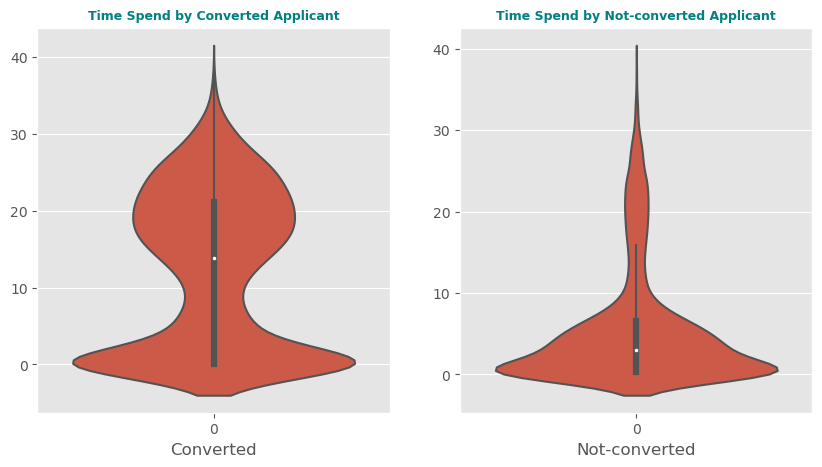

In [49]:
# Distribution of datapoint in column "Time Spend by Converted Applicant"  
plt.figure(figsize=(10,5))
df_time_1 = df["Total Time Spent on Website"].where(df["Converted"]==1)
df_time_0 = df["Total Time Spent on Website"].where(df["Converted"]==0)
plt.subplot(1,2,1)
sns.violinplot(data=df_time_1)
plt.title("Time Spend by Converted Applicant",fontdict={"fontsize":9, "fontweight":"bold"},color="teal")
plt.xlabel("Converted")
plt.subplot(1,2,2)
sns.violinplot(data=df_time_0)
plt.title("Time Spend by Not-converted Applicant",fontdict={"fontsize":9, "fontweight":"bold"},color="teal")
plt.xlabel("Not-converted")
plt.show()

#### Observations:
- The applicant who are not converted does not show interest in exploring course on website. 

- The applicant who are converted have spend average time of 15 min before enrolling. 

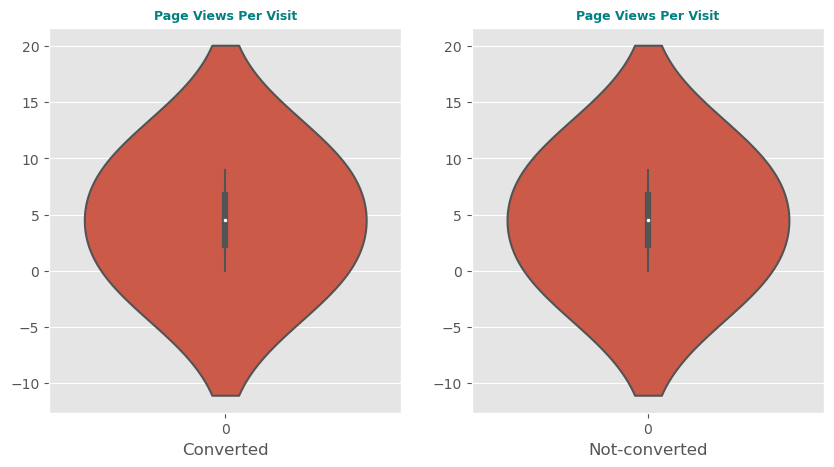

In [52]:
# Distribution of datapoint in column "Page Views Per Visit"  
plt.figure(figsize=(10,5))
df_time_1 = df["Page Views Per Visit"].where(df["Converted"]==1)
df_time_0 = df["Page Views Per Visit"].where(df["Converted"]==0)
plt.subplot(1,2,1)
sns.violinplot(data=df_time_1.quantile([0,0.99]))
plt.title("Page Views Per Visit",fontdict={"fontsize":9, "fontweight":"bold"},color="teal")
plt.xlabel("Converted")
plt.subplot(1,2,2)
sns.violinplot(data=df_time_0.quantile([0,0.99]))
plt.title("Page Views Per Visit",fontdict={"fontsize":9, "fontweight":"bold"},color="teal")
plt.xlabel("Not-converted")
plt.show()

#### Observations:
- The page views will not significantly related to Converted variable since the distribution is almost same.  

In [53]:
df["Page Views Per Visit"].describe()

count    9240.000000
mean        2.362820
std         2.145333
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [55]:
# Converted the variables of the columns "Do Not Email" and "A free copy of Mastering The Interview" to 1 for "Yes" and 0 for "No"
df["Do Not Email"] = df["Do Not Email"].map({"Yes":1, "No":0})
df["A free copy of Mastering The Interview"] = df["A free copy of Mastering The Interview"].map({"Yes":1,"No":0})

In [56]:
df_donotemail = df["Do Not Email"].value_counts()
print(df_donotemail)

0    8506
1     734
Name: Do Not Email, dtype: int64


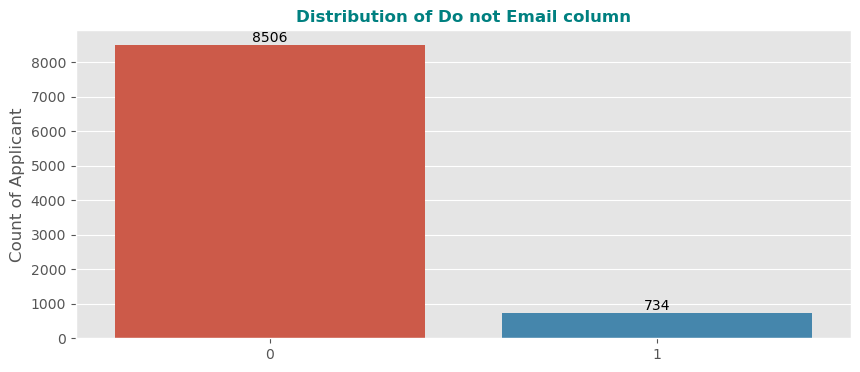

In [57]:
plt.figure(figsize=(10,4))
sns.barplot(x= df_donotemail.index, y=df_donotemail.values)
for i in range(len(df_donotemail)):
    plt.text(i,df_donotemail[i],df_donotemail[i], ha = "center", va = "bottom")
plt.title("Distribution of Do not Email column",fontdict={"fontsize":12, "fontweight":"bold"},color="teal")
plt.ylabel("Count of Applicant")
plt.show()

#### Observation:
- The majoroty of applicants who have selected for "Do NOt Email" are not convrted. 

In [58]:
# Ditribution of "A free copy of Mastering The Interview"
df_freecopy = df["A free copy of Mastering The Interview"].value_counts()
print(df_freecopy)

0    6352
1    2888
Name: A free copy of Mastering The Interview, dtype: int64


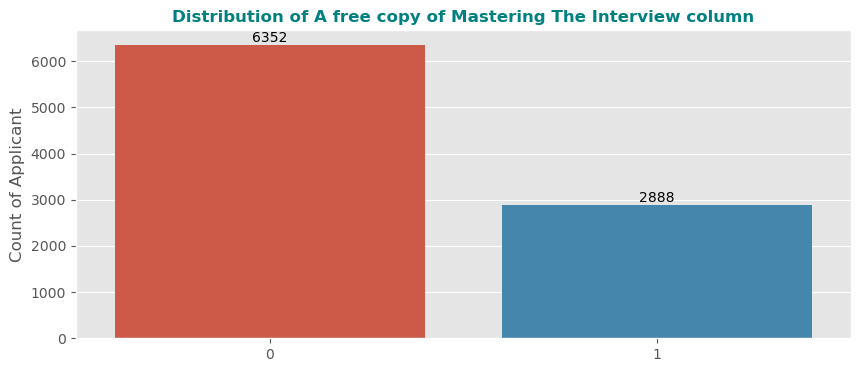

In [59]:
plt.figure(figsize=(10,4))
sns.barplot(x= df_freecopy.index, y=df_freecopy.values)
for i in range(len(df_freecopy)):
    plt.text(i,df_freecopy[i],df_freecopy[i], ha = "center", va = "bottom")
plt.title("Distribution of A free copy of Mastering The Interview column",fontdict={"fontsize":12, "fontweight":"bold"},color="teal")
plt.ylabel("Count of Applicant")
plt.show()

In [60]:
# Distribution of column Lead Origin
df["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

#### Observation:
- Since the "Quick Add Form", "Lead Add Form", "Lead Import" are with low majority, we decided to move those variables to Lead Import.

In [61]:
df["Lead Origin"] = df["Lead Origin"].replace(["Lead Add Form","Lead Import","Quick Add Form"],"Lead Import")
df_lead_origin = df["Lead Origin"].value_counts()

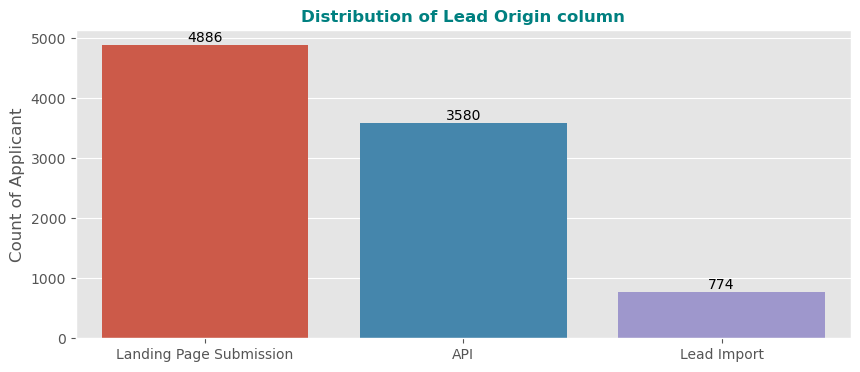

In [62]:
plt.figure(figsize=(10,4))
sns.barplot(x= df_lead_origin.index, y=df_lead_origin.values)
for i in range(len(df_lead_origin)):
    plt.text(i,df_lead_origin[i],df_lead_origin[i], ha = "center", va = "bottom")
plt.title("Distribution of Lead Origin column",fontdict={"fontsize":12, "fontweight":"bold"},color="teal")
plt.ylabel("Count of Applicant")
plt.show()

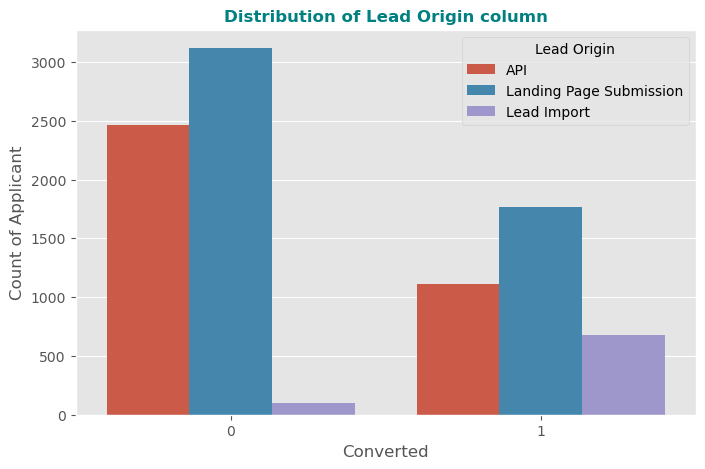

In [63]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x=df["Converted"],hue=df["Lead Origin"])
plt.title("Distribution of Lead Origin column",fontdict={"fontsize":12, "fontweight":"bold"},color="teal")
plt.ylabel("Count of Applicant")
plt.show()

#### Observations:
- The "Lead Import" having highest conversion rate


- API and "Landing Page Submission" convesion rate is lower compare to "Lead Import" 

In [64]:
# Distribution of Lead Source
df["Lead Source"].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

#### Observation:
- The variables "Google","google", "bing","Welingak Website","Referral Sites","Organic Search" are considered as a "Search_referral_Source"


- The variable "Direct Traffic","Olark Chat","Live Chat" are considered as a "Direct_Site_Source"


- The variable "Facebook","Click2call","Social Media","blog","youtubechannel","Reference","Press_Release","Pay per Click Ads","WeLearn","welearnblog_Home","testone","NC_EDM" are considered as a "Social_Media_Source"

In [65]:
df["Lead Source"] = df["Lead Source"].replace(["Google","google", "bing","Welingak Website","Referral Sites","Organic Search"],"Search_referral_Source")
df["Lead Source"] = df["Lead Source"].replace(["Direct Traffic","Olark Chat","Live Chat"],"Direct_Site_Source")
df["Lead Source"] = df["Lead Source"].replace(["Facebook","Click2call","Social Media","blog","youtubechannel","Reference","Press_Release","Pay per Click Ads","WeLearn","welearnblog_Home","testone","NC_EDM"],"Social_Media_Source")

In [66]:
df["Lead Source"].value_counts()

Search_referral_Source    4336
Direct_Site_Source        4300
Social_Media_Source        604
Name: Lead Source, dtype: int64

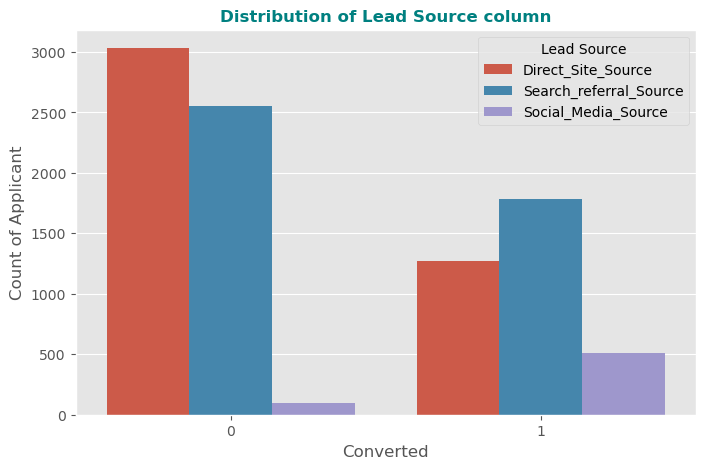

In [67]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x=df["Converted"],hue=df["Lead Source"])
plt.title("Distribution of Lead Source column",fontdict={"fontsize":12, "fontweight":"bold"},color="teal")
plt.ylabel("Count of Applicant")
plt.show()

#### Observation:
- The conversion rate of "Social_Media_Source" are higher compare to "Direct_Site_Source" and "Seach_referral_Source"

In [68]:
# Checking the distribution of Last Activity
df["Last Activity"].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

#### Observation:
- The variable "Email Opened","Olark Chat Conversation","Converted to Lead" are mapped as "Activity_Active"


- The variable "SMS Sent","Page Visited on Website","Email Link Clicked","Form Submitted on Website","Had a Phone Conversation","Resubscribed to emails" are mapped as "Activity_Moderate"


- The variables "Email Bounced","Unreachable","Unsubscribed","Approached upfront","View in browser link Clicked","Email Received","Email Marked Spam","Visited Booth in Tradeshow" are mapped as "Activity_Incative"

In [69]:
df["Last Activity"] = df["Last Activity"].replace(["Email Opened","Olark Chat Conversation","Converted to Lead"],"Activity_Active")
df["Last Activity"] = df["Last Activity"].replace(["SMS Sent","Page Visited on Website","Email Link Clicked","Form Submitted on Website","Had a Phone Conversation","Resubscribed to emails"],"Activity_Moderate")
df["Last Activity"] = df["Last Activity"].replace(["Email Bounced","Unreachable","Unsubscribed","Approached upfront","View in browser link Clicked","Email Received","Email Marked Spam","Visited Booth in Tradeshow"],"Activity_Incative")

In [70]:
df["Last Activity"].value_counts()

Activity_Active      4941
Activity_Moderate    3799
Activity_Incative     500
Name: Last Activity, dtype: int64

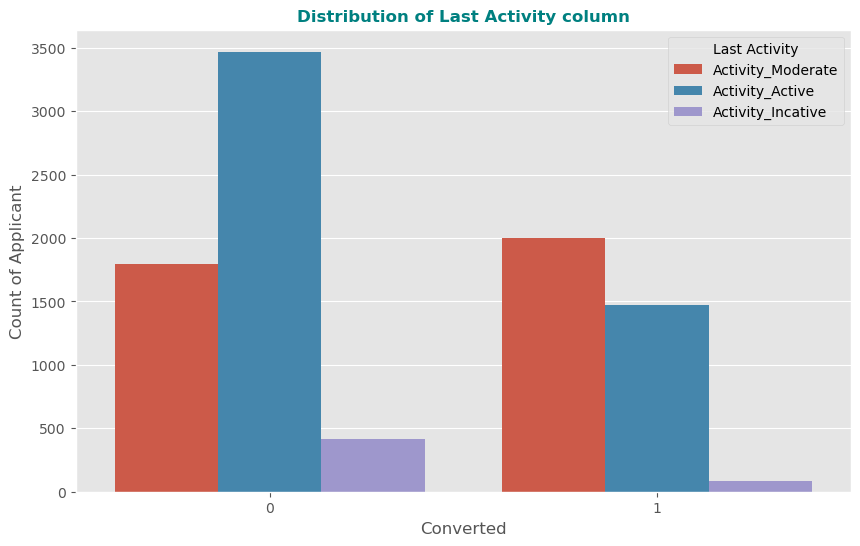

In [71]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x=df["Converted"],hue=df["Last Activity"])
plt.title("Distribution of Last Activity column",fontdict={"fontsize":12, "fontweight":"bold"},color="teal")
plt.ylabel("Count of Applicant")
plt.show()

#### Obaservation:
- The applicant who reach out with Moderate type of last activity have higher conversion rate compare to others.

In [72]:
# Checking the distribution of Specialization
df["Specialization"].value_counts()

Not_declared                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [73]:
print(df["Specialization"].value_counts())

Not_declared                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


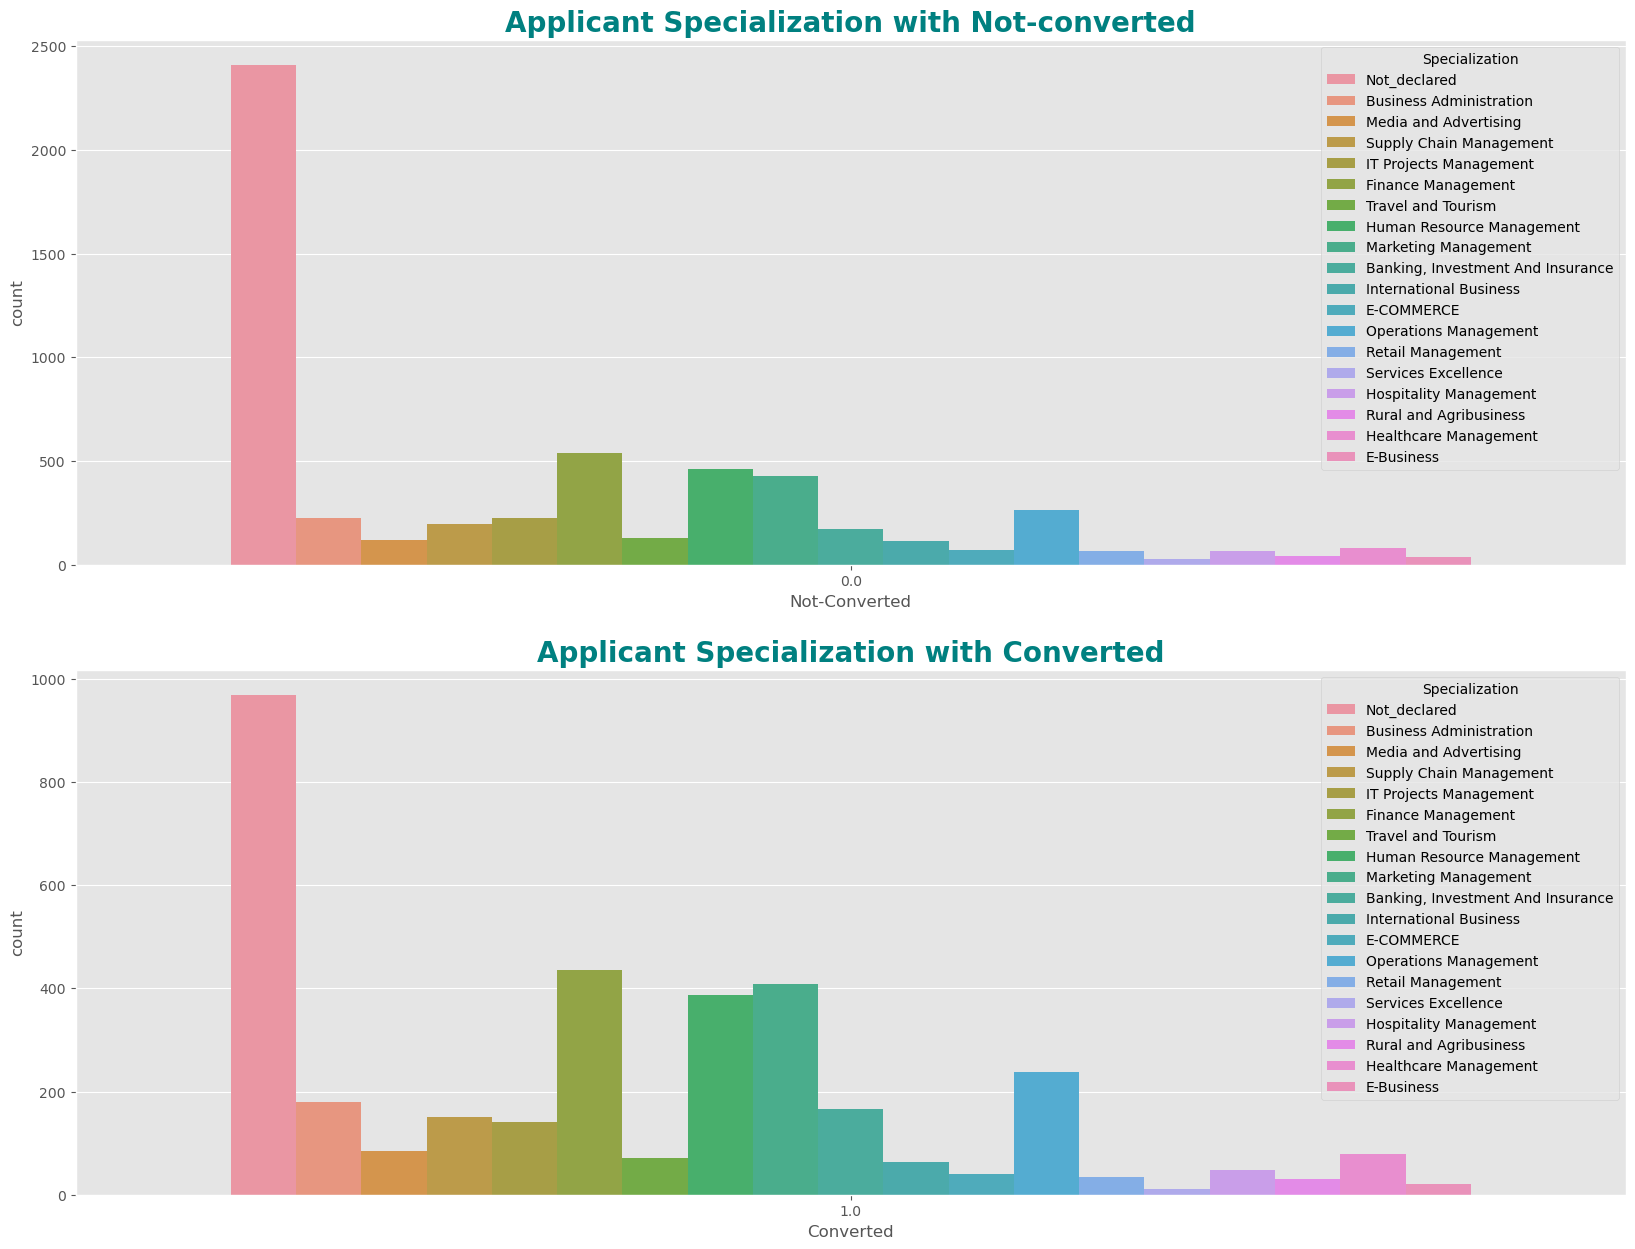

In [74]:
plt.figure(figsize=(20,15))
plt.subplot()
plt.subplot(2,1,1)
sns.countplot(data=df,x=df["Converted"].where(df["Converted"]==0),hue=df["Specialization"])
plt.title("Applicant Specialization with Not-converted",fontdict={"fontsize":20, "fontweight":"bold"},color="teal")
plt.xlabel("Not-Converted")
plt.subplot(2,1,2)
sns.countplot(data=df,x=df["Converted"].where(df["Converted"]==1),hue=df["Specialization"])
plt.title("Applicant Specialization with Converted",fontdict={"fontsize":20, "fontweight":"bold"},color="teal")
plt.xlabel("Converted")
plt.show()

#### Observation:

- The null values and Select specializations are considred as Not declaired


- Considering the imporatant variables, we have not disturb the Specializaion columns

In [75]:
print(df["What is your current occupation"].value_counts())

Unemployed              5600
Other                   2716
Working Professional     714
Student                  210
Name: What is your current occupation, dtype: int64


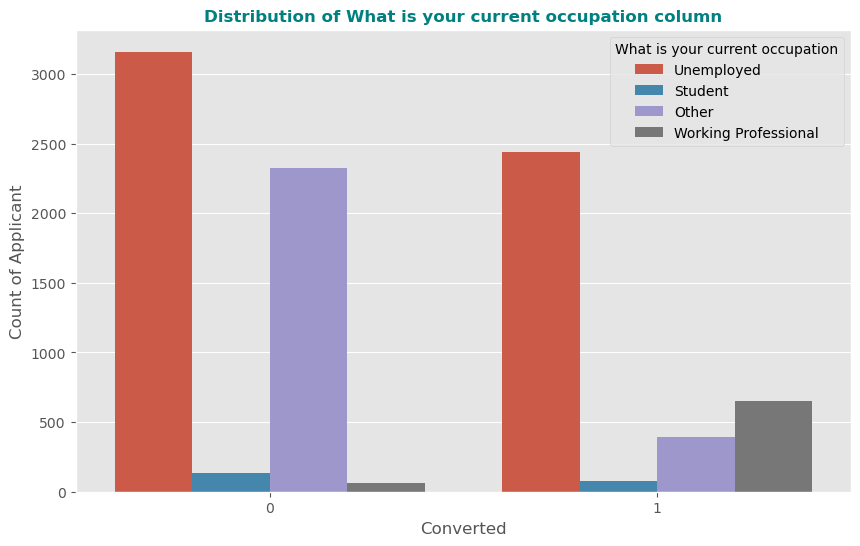

In [76]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x=df["Converted"],hue=df["What is your current occupation"])
plt.title("Distribution of What is your current occupation column",fontdict={"fontsize":12, "fontweight":"bold"},color="teal")
plt.ylabel("Count of Applicant")
plt.xlabel("Converted")
plt.show()

#### Observation:

- The applicant with Working Proffesional occupation have high conversion rate while the student have lowest.

In [77]:
print(df["How did you hear about X Education"].value_counts())

Unknown                  7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64


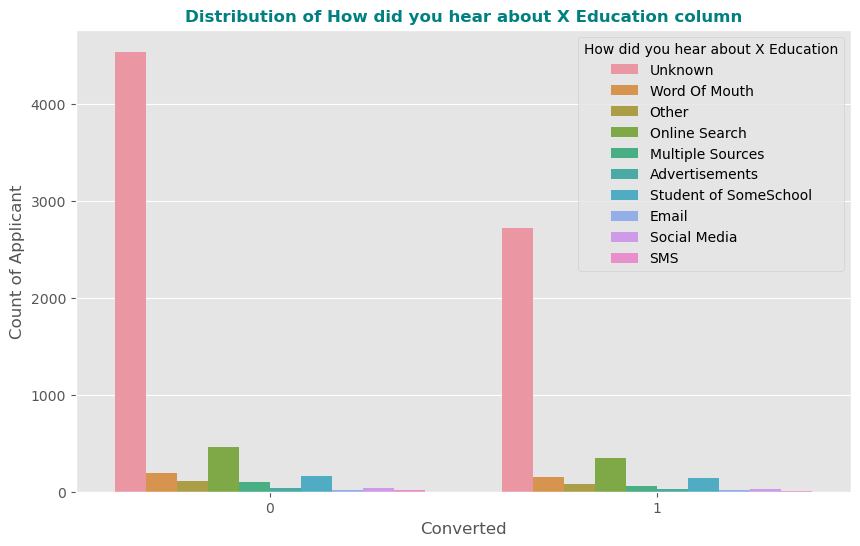

In [78]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x=df["Converted"],hue=df["How did you hear about X Education"])
plt.title("Distribution of How did you hear about X Education column",fontdict={"fontsize":12, "fontweight":"bold"},color="teal")
plt.ylabel("Count of Applicant")
plt.xlabel("Converted")
plt.show()

#### Observation:

- The Select variable in "How did you hear about X Education" considered as Unknown

In [79]:
# Checking variables in the Last Notable Activity
print(df["Last Notable Activity"].value_counts())

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64


#### Observation:
- The column purpose of "Last Activity" and "Last Notable Activity" more or less looks similar hense we decided to drop the "Last Notable Activity".

In [83]:
# Dropping the "Last Notable Activity" and "How did you hear about X Education"
drop_list_4 = ["Last Notable Activity","How did you hear about X Education"]

In [84]:
df = df.drop(columns=drop_list_4,axis=1)

In [85]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Direct_Site_Source,0,0,0.0,0.000000,0.0,Activity_Moderate,Not_declared,Unemployed,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Search_referral_Source,0,0,5.0,11.233333,2.5,Activity_Active,Not_declared,Unemployed,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct_Site_Source,0,1,2.0,25.533333,2.0,Activity_Active,Business Administration,Student,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct_Site_Source,0,0,1.0,5.083333,1.0,Activity_Incative,Media and Advertising,Unemployed,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Search_referral_Source,0,1,2.0,23.800000,1.0,Activity_Active,Not_declared,Unemployed,0


<AxesSubplot:>

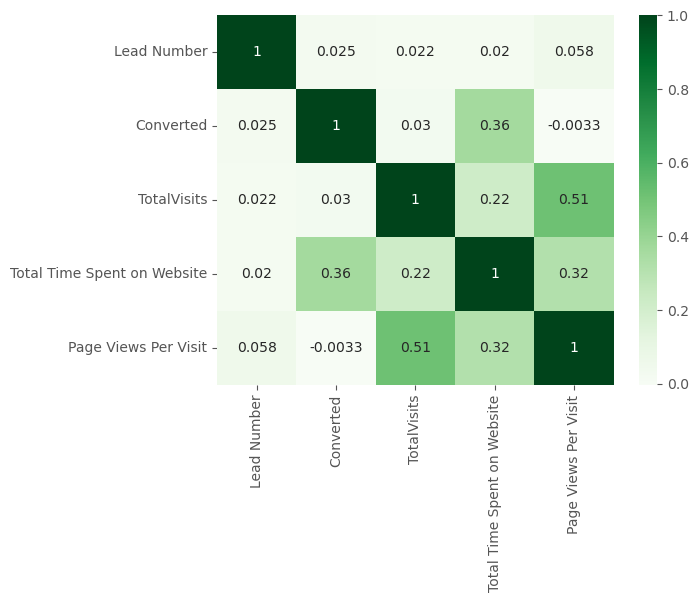

In [86]:
# Heat map for the visualize the correlation between the numberical columns
sns.heatmap(df[numerical_columns].corr(),annot=True,cmap="Greens")

#### Observation:

- The correlation between the "Page views Per Visit" and "TotalVisits" are high (0.51)

## Section : 4 
###  Data Preparation for Model Building 

In [87]:
# Get dummies of "Lead Origin"
df["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Lead Import                 774
Name: Lead Origin, dtype: int64

In [88]:
dummies_Lead_Origin = pd.get_dummies(df["Lead Origin"])
dummies_Lead_Origin = dummies_Lead_Origin.drop(columns="Lead Import",axis=1)
df = pd.concat([df,dummies_Lead_Origin],axis=1)
df = df.drop(columns="Lead Origin",axis=1)
df.head()

,Prospect ID,Lead Number,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,API,Landing Page Submission
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,Direct_Site_Source,0,0,0.0,0.000000,0.0,Activity_Moderate,Not_declared,Unemployed,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,Search_referral_Source,0,0,5.0,11.233333,2.5,Activity_Active,Not_declared,Unemployed,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Direct_Site_Source,0,1,2.0,25.533333,2.0,Activity_Active,Business Administration,Student,1,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Direct_Site_Source,0,0,1.0,5.083333,1.0,Activity_Incative,Media and Advertising,Unemployed,0,0,1
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Search_referral_Source,0,1,2.0,23.800000,1.0,Activity_Active,Not_declared,Unemployed,0,0,1


In [89]:
# Get dummies for the "Lead Source"
df["Lead Source"].value_counts()

Search_referral_Source    4336
Direct_Site_Source        4300
Social_Media_Source        604
Name: Lead Source, dtype: int64

In [90]:
dummies_Lead_Source = pd.get_dummies(df["Lead Source"])
dummies_Lead_Source = dummies_Lead_Source.drop(columns="Social_Media_Source",axis=1)
df = pd.concat([df,dummies_Lead_Source],axis=1)
df = df.drop(columns="Lead Source",axis=1)
df.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,API,Landing Page Submission,Direct_Site_Source,Search_referral_Source
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0.000000,0.0,Activity_Moderate,Not_declared,Unemployed,0,1,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,11.233333,2.5,Activity_Active,Not_declared,Unemployed,0,1,0,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,25.533333,2.0,Activity_Active,Business Administration,Student,1,0,1,1,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,5.083333,1.0,Activity_Incative,Media and Advertising,Unemployed,0,0,1,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,23.800000,1.0,Activity_Active,Not_declared,Unemployed,0,0,1,0,1


In [91]:
# Get dummies for the Last Activity
df["Last Activity"].value_counts()

Activity_Active      4941
Activity_Moderate    3799
Activity_Incative     500
Name: Last Activity, dtype: int64

In [92]:
dummies_Last_Activity = pd.get_dummies(df["Last Activity"])
dummies_Last_Activity = dummies_Last_Activity.drop(columns="Activity_Incative",axis=1)
df = pd.concat([df,dummies_Last_Activity],axis=1)
df = df.drop(columns="Last Activity",axis=1)
df.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview,API,Landing Page Submission,Direct_Site_Source,Search_referral_Source,Activity_Active,Activity_Moderate
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0.000000,0.0,Not_declared,Unemployed,0,1,0,1,0,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,11.233333,2.5,Not_declared,Unemployed,0,1,0,0,1,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,25.533333,2.0,Business Administration,Student,1,0,1,1,0,1,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,5.083333,1.0,Media and Advertising,Unemployed,0,0,1,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,23.800000,1.0,Not_declared,Unemployed,0,0,1,0,1,1,0


In [93]:
# Get dummies for the Specializations
df["Specialization"].value_counts()

Not_declared                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [94]:
dummies_Specialization = pd.get_dummies(df["Specialization"])
dummies_Specialization = dummies_Specialization.drop(columns="Not_declared",axis=1)
df = pd.concat([df,dummies_Specialization],axis=1)
df = df.drop(columns="Specialization",axis=1)
df.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,A free copy of Mastering The Interview,API,Landing Page Submission,Direct_Site_Source,Search_referral_Source,Activity_Active,Activity_Moderate,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0.000000,0.0,Unemployed,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,11.233333,2.5,Unemployed,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,25.533333,2.0,Student,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,5.083333,1.0,Unemployed,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,23.800000,1.0,Unemployed,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [95]:
# Get dummies for the "What is your current occupation"
df["What is your current occupation"].value_counts()

Unemployed              5600
Other                   2716
Working Professional     714
Student                  210
Name: What is your current occupation, dtype: int64

In [96]:
dummies_Occupation = pd.get_dummies(df["What is your current occupation"])
dummies_Occupation = dummies_Occupation.drop(columns="Other",axis=1)
df = pd.concat([df,dummies_Occupation],axis=1)
df = df.drop(columns="What is your current occupation",axis=1)
df.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,API,Landing Page Submission,Direct_Site_Source,Search_referral_Source,Activity_Active,Activity_Moderate,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Student,Unemployed,Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0.000000,0.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,11.233333,2.5,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,25.533333,2.0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,5.083333,1.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,23.800000,1.0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [102]:
df.shape

(9240, 35)

In [103]:
df.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,API,Landing Page Submission,Direct_Site_Source,Search_referral_Source,Activity_Active,Activity_Moderate,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Student,Unemployed,Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0.000000,0.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,11.233333,2.5,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,25.533333,2.0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,5.083333,1.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,23.800000,1.0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Section : 5 
###  Model Building 

In [104]:
# Get target/dependent variable on y and indepedent variables on X 
y = df.pop("Converted")
X = df

In [105]:
X.head()

,Prospect ID,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,API,Landing Page Submission,Direct_Site_Source,Search_referral_Source,Activity_Active,Activity_Moderate,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Student,Unemployed,Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0.000000,0.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,11.233333,2.5,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,2.0,25.533333,2.0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,5.083333,1.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,2.0,23.800000,1.0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### Spliting the dataset for train and test

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [107]:
numerical_columns

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

### Scale the data set with MinMaxScaler

In [108]:
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]= scaler.fit_transform(X_train[['TotalVisits',
                                                                                                 'Total Time Spent on Website',
                                                                                                  'Page Views Per Visit']])

X_train.head()

,Prospect ID,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,API,Landing Page Submission,Direct_Site_Source,Search_referral_Source,Activity_Active,Activity_Moderate,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Student,Unemployed,Working Professional
1871,f3af2d98-02db-45d7-bbf6-c641d6b4f4c3,641410,0,0.000000,0.000000,0.000000,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
6795,207aaf73-a121-41b8-96bb-b0d5c38e7a7b,597687,0,0.015936,0.214349,0.024182,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3516,db308a34-ade6-4f0d-9779-586c5be188c7,626825,0,0.019920,0.046655,0.045455,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8105,1199b37d-f610-4bb8-bf18-15267dec61fa,587928,0,0.019920,0.541373,0.090909,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3934,6b2d3b2f-9990-449c-9333-012b578e39c8,622366,0,0.000000,0.000000,0.000000,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [109]:
X_train_ID = X_train[["Lead Number"]]
X_test_ID = X_test[["Lead Number"]]

In [110]:
X_train = X_train.drop(columns=["Prospect ID", "Lead Number"],axis=1)
X_test = X_test.drop(columns=["Prospect ID", "Lead Number"],axis=1)

In [111]:
# Visualize the X_train
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,API,Landing Page Submission,Direct_Site_Source,Search_referral_Source,Activity_Active,Activity_Moderate,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Student,Unemployed,Working Professional
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.078386,0.013843,0.212974,0.042787,0.311843,0.387137,0.528139,0.461967,0.470625,0.529530,0.416976,0.035096,0.043599,0.005720,0.012987,0.105442,0.015615,0.013451,0.091682,0.037260,0.018707,0.093383,0.020563,0.057205,0.010823,0.007267,0.004793,0.037570,0.021336,0.021027,0.605133,0.078541
std,0.268799,0.021047,0.240566,0.039318,0.463282,0.487133,0.499246,0.498590,0.499175,0.499166,0.493097,0.184036,0.204218,0.075423,0.113227,0.307146,0.123991,0.115204,0.288599,0.189414,0.135500,0.290991,0.141926,0.232251,0.103475,0.084940,0.069069,0.190168,0.144512,0.143484,0.488860,0.269041
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.003984,0.005282,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.011952,0.108275,0.036364,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.019920,0.407790,0.054545,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
# Checking the Convestion rate
converted_rate = round(y.value_counts()[1]/y.shape[0]*100,2)
print(f"{converted_rate}%")

38.54%


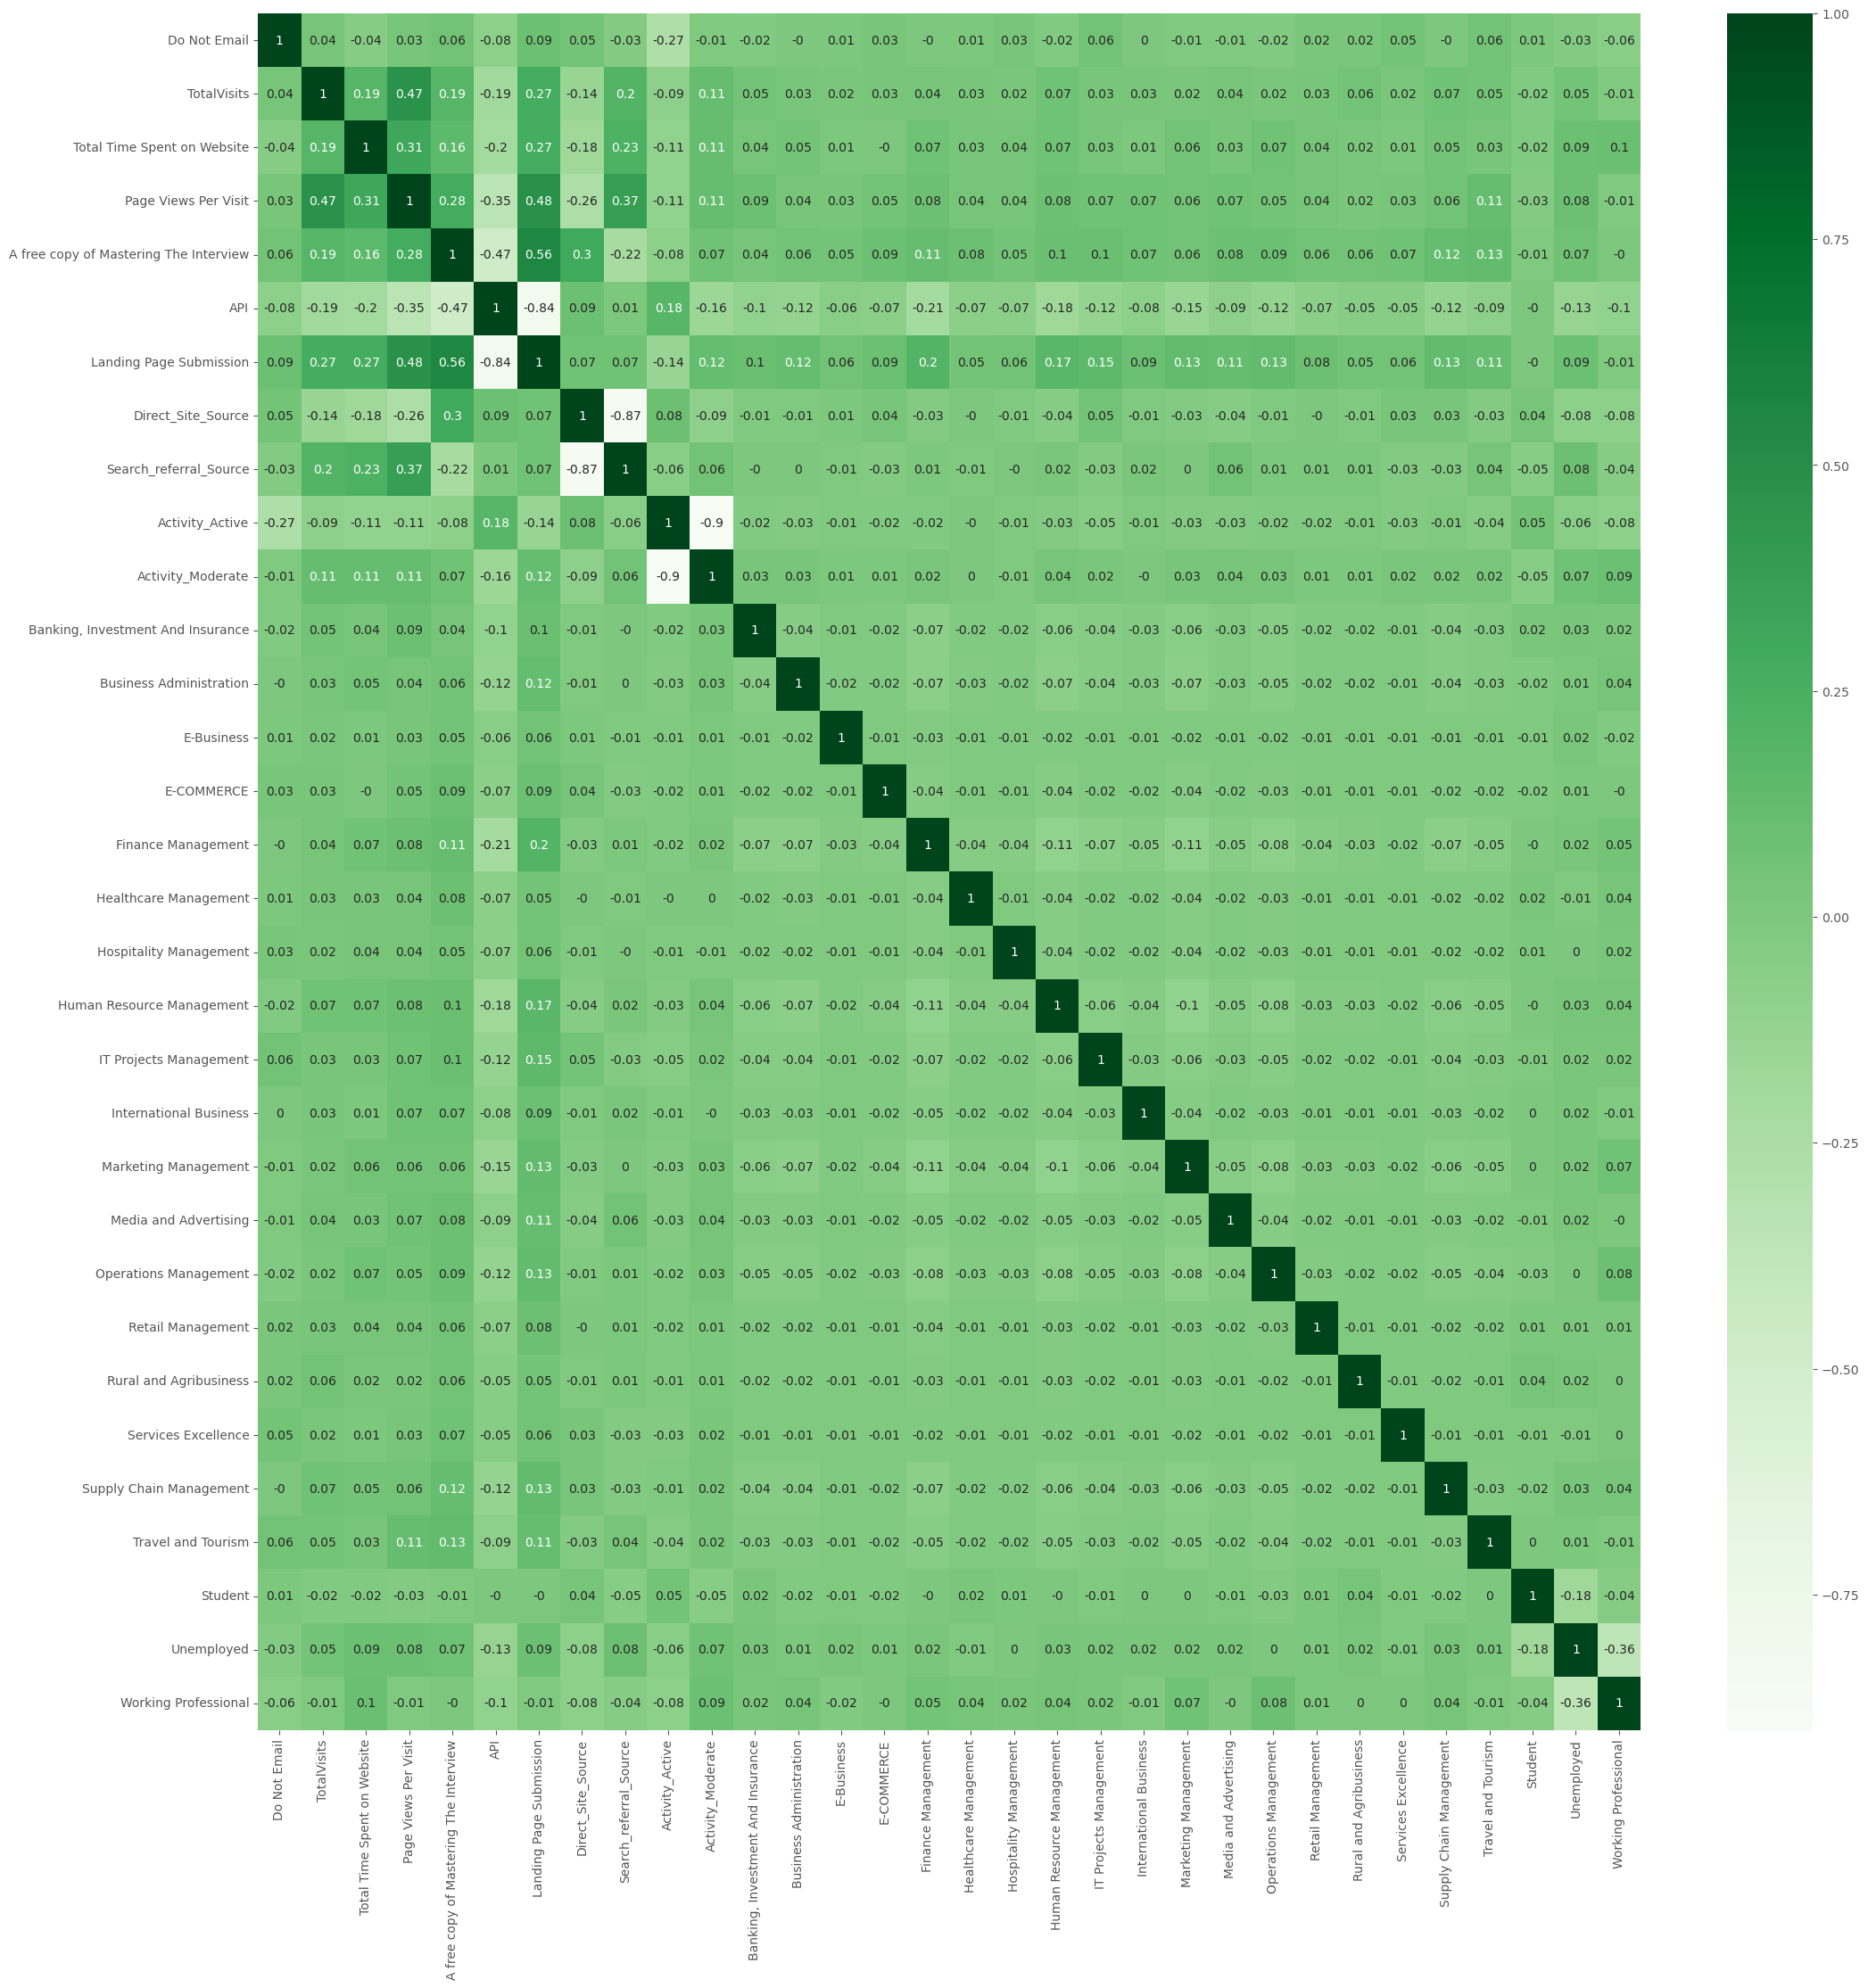

In [113]:
# Checking the correlations within the independent variables
plt.figure(figsize=(25,25))
sns.heatmap(round(X_train.corr(),2),annot=True,cmap="Greens")
plt.show()

In [114]:
# Model_0 with all variables
lr0 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lr0.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6435
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2809.0
Date:                Sun, 13 Aug 2023   Deviance:                       5617.9
Time:                        22:20:28   Pearson chi2:                 6.85e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3692
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.7349      0.285     -2.582      0.010      -1.293      -0.177
Do Not Email                              -1.3834      0.186     -7.428      0.000      -1.748      -1.018
TotalVisits                                3.4279      1.827      1.877      0.061      -0.152       7.008
Total Time Spent on Website                4.1712      0.155     26.851      0.000       3.867       4.476
Page Views Per Visit                      -4.1710      1.233     -3.382      0.001      -6.588      -1.754
A free copy of Mastering The Interview    -0.4239      0.094     -4.510      0.000      -0.608      -0.240
API                                       -3.5278      0.328    -10.744      0.000      -4.171      -2.884
Landing Page Submission                   -4.6598      0.348    -13.391      0.000      -5.342      -3.978
Direct_Site_Source                         1.6176      0.360      4.487      0.000       0.911       2.324
Search_referral_Source                     1.4245      0.351      4.061      0.000       0.737       2.112
Activity_Active                           -0.0687      0.226     -0.304      0.761      -0.511       0.374
Activity_Moderate                          0.9243      0.222      4.171      0.000       0.490       1.359
Banking, Investment And Insurance          1.2738      0.205      6.214      0.000       0.872       1.676
Business Administration                    0.9639      0.195      4.952      0.000       0.582       1.345
E-Business                                 0.9272      0.439      2.111      0.035       0.066       1.788
E-COMMERCE                                 1.3669      0.305      4.480      0.000       0.769       1.965
Finance Management                         1.2569      0.152      8.281      0.000       0.959       1.554
Healthcare Management                      1.4735      0.287      5.130      0.000       0.911       2.036
Hospitality Management                     0.2204      0.327      0.673      0.501      -0.421       0.862
Human Resource Management                  1.0319      0.155      6.640      0.000       0.727       1.336
IT Projects Management                     1.2008      0.206      5.816      0.000       0.796       1.605
International Business                     0.7880      0.269      2.933      0.003       0.261       1.315
Marketing Management                       1.0134      0.150      6.760      0.000       0.720       1.307
Media and Advertising                      1.2502      0.243      5.144      0.000       0.774       1.727
Operations Management                      1.0800      0.178      6.067      0.000       0.731       1.429
Retail Management                          0.7208      0.343      2.102      0.036     

#### Observation:
- The multiple variables have very high p-value, so decided to get best fit variable by Reccursive Features Elemination(RFE)

### Apply Reccurssice Features Elemination (RFE)

In [115]:
# Build Model with LogisticRegression and apply RFE
lr_rfe = LogisticRegression()
rfe = RFE(lr_rfe,n_features_to_select=25,verbose=0)
rfe = rfe.fit(X_train,y_train)

In [116]:
# Checking the best fit variables
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 6),
 ('API', True, 1),
 ('Landing Page Submission', True, 1),
 ('Direct_Site_Source', True, 1),
 ('Search_referral_Source', True, 1),
 ('Activity_Active', False, 7),
 ('Activity_Moderate', True, 1),
 ('Banking, Investment And Insurance', True, 1),
 ('Business Administration', True, 1),
 ('E-Business', False, 2),
 ('E-COMMERCE', True, 1),
 ('Finance Management', True, 1),
 ('Healthcare Management', True, 1),
 ('Hospitality Management', False, 8),
 ('Human Resource Management', True, 1),
 ('IT Projects Management', True, 1),
 ('International Business', False, 3),
 ('Marketing Management', True, 1),
 ('Media and Advertising', True, 1),
 ('Operations Management', True, 1),
 ('Retail Management', False, 5),
 ('Rural and Agribusiness', True, 1),
 ('Services Excellence', False, 4),
 ('Supply Chain Management', 

In [117]:
# Getting selected variables in col
col = X_train.columns[rfe.support_]
col_not_select = X_train.columns[~rfe.support_]
print(col)
print("")
print(col_not_select)
print("")
print("Total selected column =",len(col))

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'API', 'Landing Page Submission',
       'Direct_Site_Source', 'Search_referral_Source', 'Activity_Moderate',
       'Banking, Investment And Insurance', 'Business Administration',
       'E-COMMERCE', 'Finance Management', 'Healthcare Management',
       'Human Resource Management', 'IT Projects Management',
       'Marketing Management', 'Media and Advertising',
       'Operations Management', 'Rural and Agribusiness',
       'Supply Chain Management', 'Travel and Tourism', 'Student',
       'Unemployed', 'Working Professional'],
      dtype='object')

Index(['A free copy of Mastering The Interview', 'Activity_Active',
       'E-Business', 'Hospitality Management', 'International Business',
       'Retail Management', 'Services Excellence'],
      dtype='object')

Total selected column = 25


In [118]:
# Build Model lr1 with selected variable in Statemodel
lr1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
lr1.fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2825.2
Date:                Sun, 13 Aug 2023   Deviance:                       5650.4
Time:                        22:20:29   Pearson chi2:                 6.72e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.6667      0.179     -3.724      0.000      -1.017      -0.316
Do Not Email                         -1.3242      0.160     -8.259      0.000      -1.638      -1.010
TotalVisits                           2.9465      1.768      1.667      0.096      -0.518       6.411
Total Time Spent on Website           4.1437      0.154     26.900      0.000       3.842       4.446
Page Views Per Visit                 -4.4888      1.223     -3.671      0.000      -6.886      -2.092
API                                  -3.4187      0.327    -10.469      0.000      -4.059      -2.779
Landing Page Submission              -4.4920      0.341    -13.168      0.000      -5.161      -3.823
Direct_Site_Source                    1.3519      0.355      3.807      0.000       0.656       2.048
Search_referral_Source                1.3027      0.348      3.746      0.000       0.621       1.984
Activity_Moderate                     0.9816      0.068     14.447      0.000       0.848       1.115
Banking, Investment And Insurance     1.0075      0.193      5.231      0.000       0.630       1.385
Business Administration               0.6771      0.182      3.723      0.000       0.321       1.034
E-COMMERCE                            1.0073      0.294      3.423      0.001       0.430       1.584
Finance Management                    0.9704      0.135      7.212      0.000       0.707       1.234
Healthcare Management                 1.1103      0.273      4.061      0.000       0.574       1.646
Human Resource Management             0.7394      0.139      5.333      0.000       0.468       1.011
IT Projects Management                0.9074      0.193      4.701      0.000       0.529       1.286
Marketing Management                  0.7605      0.136      5.610      0.000       0.495       1.026
Media and Advertising                 0.9134      0.231      3.960      0.000       0.461       1.365
Operations Management                 0.7833      0.164      4.780      0.000       0.462       1.104
Rural and Agribusiness                1.3002      0.390      3.331      0.001       0.535       2.065
Supply Chain Management               0.7079      0.190      3.734      0.000       0.336       1.079
Travel and Tourism                    0.8372      0.243      3.445      0.001       0.361       1.314
Student                               1.2453      0.233      5.334      0.000       0.788       1.703
Unemployed                            1.1301      0.084     13.494      0.000       0.966       1.294
Working Professional                  3.4909      0.191     18.294      0.000       3.117       3.865
=====================================================================================================
"""

#### Observation: 

- The column "TotalVisits" have high p-value (0.096), hence decided to drop it.

In [119]:
# Droping end build the model lr2 with statemodel
col = col.drop("TotalVisits")
lr2 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
lr2.fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2826.8
Date:                Sun, 13 Aug 2023   Deviance:                       5653.6
Time:                        22:20:29   Pearson chi2:                 6.71e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3657
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.6702      0.179     -3.745      0.000      -1.021      -0.319
Do Not Email                         -1.3122      0.160     -8.198      0.000      -1.626      -0.998
Total Time Spent on Website           4.1464      0.154     26.934      0.000       3.845       4.448
Page Views Per Visit                 -3.8331      1.152     -3.326      0.001      -6.092      -1.574
API                                  -3.4063      0.326    -10.437      0.000      -4.046      -2.767
Landing Page Submission              -4.4785      0.341    -13.135      0.000      -5.147      -3.810
Direct_Site_Source                    1.3477      0.355      3.797      0.000       0.652       2.043
Search_referral_Source                1.3028      0.348      3.748      0.000       0.621       1.984
Activity_Moderate                     0.9873      0.068     14.551      0.000       0.854       1.120
Banking, Investment And Insurance     1.0146      0.192      5.273      0.000       0.637       1.392
Business Administration               0.6822      0.182      3.754      0.000       0.326       1.038
E-COMMERCE                            1.0093      0.294      3.431      0.001       0.433       1.586
Finance Management                    0.9739      0.135      7.238      0.000       0.710       1.238
Healthcare Management                 1.1202      0.273      4.100      0.000       0.585       1.656
Human Resource Management             0.7489      0.139      5.405      0.000       0.477       1.020
IT Projects Management                0.9100      0.193      4.713      0.000       0.532       1.289
Marketing Management                  0.7616      0.136      5.620      0.000       0.496       1.027
Media and Advertising                 0.9184      0.231      3.980      0.000       0.466       1.371
Operations Management                 0.7852      0.164      4.793      0.000       0.464       1.106
Rural and Agribusiness                1.3465      0.390      3.449      0.001       0.581       2.112
Supply Chain Management               0.7281      0.189      3.852      0.000       0.358       1.099
Travel and Tourism                    0.8404      0.243      3.459      0.001       0.364       1.317
Student                               1.2419      0.233      5.323      0.000       0.785       1.699
Unemployed                            1.1300      0.084     13.495      0.000       0.966       1.294
Working Professional                  3.4868      0.191     18.277      0.000       3.113       3.861
=====================================================================================================
"""

#### Observation: 

- The p-values of all the columns are under 0.05, hence decided to check varience inflation factors within independent variables

In [120]:
#Checking the vif
vif1 = pd.DataFrame()
vif1['Features'] = X_train[col].columns
vif1['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

,Features,VIF
4,Landing Page Submission,32.09
5,Direct_Site_Source,26.35
6,Search_referral_Source,24.99
3,API,20.94
2,Page Views Per Visit,3.49
22,Unemployed,2.86
1,Total Time Spent on Website,2.16
7,Activity_Moderate,1.76
11,Finance Management,1.65
13,Human Resource Management,1.56


#### Observation: 

- The column "Landing Page Submission" have high VIF value(32.09), hence decided to drop it.

In [121]:
#Doping the columns and build the lr3 model
col = col.drop("Landing Page Submission")
lr3 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
lr3.fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2977.6
Date:                Sun, 13 Aug 2023   Deviance:                       5955.2
Time:                        22:20:30   Pearson chi2:                 6.49e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3355
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.6414      0.171     -3.759      0.000      -0.976      -0.307
Do Not Email                         -1.1682      0.149     -7.847      0.000      -1.460      -0.876
Total Time Spent on Website           3.8090      0.149     25.640      0.000       3.518       4.100
Page Views Per Visit                 -9.6528      1.158     -8.335      0.000     -11.923      -7.383
API                                   0.3549      0.093      3.797      0.000       0.172       0.538
Direct_Site_Source                   -2.4097      0.162    -14.907      0.000      -2.727      -2.093
Search_referral_Source               -2.1258      0.168    -12.672      0.000      -2.455      -1.797
Activity_Moderate                     1.0127      0.066     15.398      0.000       0.884       1.142
Banking, Investment And Insurance     0.5483      0.185      2.971      0.003       0.187       0.910
Business Administration               0.1457      0.174      0.838      0.402      -0.195       0.486
E-COMMERCE                            0.4997      0.286      1.749      0.080      -0.060       1.060
Finance Management                    0.4476      0.126      3.547      0.000       0.200       0.695
Healthcare Management                 0.7333      0.265      2.771      0.006       0.215       1.252
Human Resource Management             0.2518      0.130      1.933      0.053      -0.004       0.507
IT Projects Management                0.3458      0.187      1.848      0.065      -0.021       0.713
Marketing Management                  0.2745      0.128      2.150      0.032       0.024       0.525
Media and Advertising                 0.3551      0.225      1.577      0.115      -0.086       0.796
Operations Management                 0.2862      0.155      1.841      0.066      -0.018       0.591
Rural and Agribusiness                0.7725      0.379      2.036      0.042       0.029       1.516
Supply Chain Management               0.2161      0.182      1.189      0.235      -0.140       0.573
Travel and Tourism                    0.2661      0.236      1.128      0.259      -0.196       0.729
Student                               1.2721      0.224      5.683      0.000       0.833       1.711
Unemployed                            1.2665      0.082     15.470      0.000       1.106       1.427
Working Professional                  3.6014      0.188     19.154      0.000       3.233       3.970
=====================================================================================================
"""

#### Observation: 

- The column "Business Administration" have high p-value (0.402), hence decided to drop it.

In [122]:
# Drop the column and build the lr4 model
col = col.drop("Business Administration")
lr4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
lr4.fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2977.9
Date:                Sun, 13 Aug 2023   Deviance:                       5955.9
Time:                        22:20:30   Pearson chi2:                 6.50e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3354
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.6246      0.170     -3.685      0.000      -0.957      -0.292
Do Not Email                         -1.1700      0.149     -7.860      0.000      -1.462      -0.878
Total Time Spent on Website           3.8158      0.148     25.718      0.000       3.525       4.107
Page Views Per Visit                 -9.6064      1.156     -8.311      0.000     -11.872      -7.341
API                                   0.3322      0.089      3.717      0.000       0.157       0.507
Direct_Site_Source                   -2.3996      0.161    -14.889      0.000      -2.716      -2.084
Search_referral_Source               -2.1188      0.168    -12.648      0.000      -2.447      -1.790
Activity_Moderate                     1.0130      0.066     15.403      0.000       0.884       1.142
Banking, Investment And Insurance     0.5192      0.181      2.865      0.004       0.164       0.874
E-COMMERCE                            0.4689      0.283      1.655      0.098      -0.087       1.024
Finance Management                    0.4178      0.121      3.452      0.001       0.181       0.655
Healthcare Management                 0.7038      0.262      2.684      0.007       0.190       1.218
Human Resource Management             0.2221      0.125      1.773      0.076      -0.023       0.468
IT Projects Management                0.3154      0.184      1.718      0.086      -0.044       0.675
Marketing Management                  0.2467      0.123      2.002      0.045       0.005       0.488
Media and Advertising                 0.3252      0.222      1.462      0.144      -0.111       0.761
Operations Management                 0.2570      0.151      1.697      0.090      -0.040       0.554
Rural and Agribusiness                0.7447      0.378      1.970      0.049       0.004       1.486
Supply Chain Management               0.1858      0.178      1.043      0.297      -0.163       0.535
Travel and Tourism                    0.2357      0.233      1.011      0.312      -0.221       0.693
Student                               1.2717      0.224      5.684      0.000       0.833       1.710
Unemployed                            1.2694      0.082     15.516      0.000       1.109       1.430
Working Professional                  3.6110      0.188     19.249      0.000       3.243       3.979
=====================================================================================================
"""

#### Observation: 

- The column "Travel and Tourism" have high p-value (0.312), hence decided to drop it.

In [123]:
# Drop the column and build model lr5
col = col.drop("Travel and Tourism")
lr5 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
lr5.fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2978.4
Date:                Sun, 13 Aug 2023   Deviance:                       5956.9
Time:                        22:20:30   Pearson chi2:                 6.49e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3353
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.6148      0.169     -3.632      0.000      -0.947      -0.283
Do Not Email                         -1.1629      0.149     -7.821      0.000      -1.454      -0.872
Total Time Spent on Website           3.8175      0.148     25.727      0.000       3.527       4.108
Page Views Per Visit                 -9.4816      1.149     -8.255      0.000     -11.733      -7.231
API                                   0.3165      0.088      3.600      0.000       0.144       0.489
Direct_Site_Source                   -2.3925      0.161    -14.861      0.000      -2.708      -2.077
Search_referral_Source               -2.1131      0.167    -12.621      0.000      -2.441      -1.785
Activity_Moderate                     1.0130      0.066     15.405      0.000       0.884       1.142
Banking, Investment And Insurance     0.4964      0.180      2.762      0.006       0.144       0.849
E-COMMERCE                            0.4450      0.282      1.576      0.115      -0.108       0.998
Finance Management                    0.3953      0.119      3.325      0.001       0.162       0.628
Healthcare Management                 0.6807      0.261      2.607      0.009       0.169       1.192
Human Resource Management             0.1999      0.123      1.621      0.105      -0.042       0.441
IT Projects Management                0.2922      0.182      1.605      0.108      -0.065       0.649
Marketing Management                  0.2261      0.121      1.861      0.063      -0.012       0.464
Media and Advertising                 0.3015      0.221      1.363      0.173      -0.132       0.735
Operations Management                 0.2353      0.150      1.571      0.116      -0.058       0.529
Rural and Agribusiness                0.7230      0.377      1.917      0.055      -0.016       1.462
Supply Chain Management               0.1629      0.177      0.922      0.357      -0.183       0.509
Student                               1.2733      0.224      5.695      0.000       0.835       1.712
Unemployed                            1.2699      0.082     15.521      0.000       1.110       1.430
Working Professional                  3.6146      0.188     19.277      0.000       3.247       3.982
=====================================================================================================
"""

#### Observation: 

- The column "Supply Chain Management" have high p-value (0.357), hence decided to drop it.

In [124]:
# Drop the column and build model lr6
col = col.drop("Supply Chain Management")
lr6 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
lr6.fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2978.9
Date:                Sun, 13 Aug 2023   Deviance:                       5957.7
Time:                        22:20:30   Pearson chi2:                 6.49e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3352
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.6014      0.169     -3.566      0.000      -0.932      -0.271
Do Not Email                         -1.1647      0.149     -7.836      0.000      -1.456      -0.873
Total Time Spent on Website           3.8227      0.148     25.775      0.000       3.532       4.113
Page Views Per Visit                 -9.4138      1.145     -8.221      0.000     -11.658      -7.170
API                                   0.2983      0.086      3.485      0.000       0.131       0.466
Direct_Site_Source                   -2.3840      0.161    -14.837      0.000      -2.699      -2.069
Search_referral_Source               -2.1099      0.167    -12.606      0.000      -2.438      -1.782
Activity_Moderate                     1.0118      0.066     15.392      0.000       0.883       1.141
Banking, Investment And Insurance     0.4724      0.178      2.657      0.008       0.124       0.821
E-COMMERCE                            0.4194      0.281      1.493      0.135      -0.131       0.970
Finance Management                    0.3709      0.116      3.202      0.001       0.144       0.598
Healthcare Management                 0.6563      0.260      2.526      0.012       0.147       1.165
Human Resource Management             0.1757      0.120      1.459      0.145      -0.060       0.412
IT Projects Management                0.2673      0.180      1.485      0.138      -0.086       0.620
Marketing Management                  0.2034      0.119      1.711      0.087      -0.030       0.436
Media and Advertising                 0.2774      0.220      1.263      0.207      -0.153       0.708
Operations Management                 0.2114      0.148      1.433      0.152      -0.078       0.501
Rural and Agribusiness                0.7005      0.376      1.861      0.063      -0.037       1.438
Student                               1.2723      0.223      5.694      0.000       0.834       1.710
Unemployed                            1.2730      0.082     15.573      0.000       1.113       1.433
Working Professional                  3.6245      0.187     19.362      0.000       3.258       3.991
=====================================================================================================
"""

#### Observation: 

- The column "Media and Advertising" have high p-value (0.207), hence decided to drop it.

In [125]:
# Drop the column and build the model lr7
col = col.drop("Media and Advertising")
lr7 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
lr7.fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2979.6
Date:                Sun, 13 Aug 2023   Deviance:                       5959.3
Time:                        22:20:31   Pearson chi2:                 6.49e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3350
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.5902      0.168     -3.504      0.000      -0.920      -0.260
Do Not Email                         -1.1654      0.149     -7.848      0.000      -1.457      -0.874
Total Time Spent on Website           3.8236      0.148     25.789      0.000       3.533       4.114
Page Views Per Visit                 -9.3436      1.142     -8.185      0.000     -11.581      -7.106
API                                   0.2810      0.084      3.328      0.001       0.116       0.446
Direct_Site_Source                   -2.3771      0.161    -14.806      0.000      -2.692      -2.062
Search_referral_Source               -2.1011      0.167    -12.568      0.000      -2.429      -1.773
Activity_Moderate                     1.0131      0.066     15.415      0.000       0.884       1.142
Banking, Investment And Insurance     0.4502      0.177      2.546      0.011       0.104       0.797
E-COMMERCE                            0.3963      0.280      1.414      0.157      -0.153       0.946
Finance Management                    0.3485      0.114      3.046      0.002       0.124       0.573
Healthcare Management                 0.6340      0.259      2.447      0.014       0.126       1.142
Human Resource Management             0.1533      0.119      1.288      0.198      -0.080       0.387
IT Projects Management                0.2446      0.179      1.366      0.172      -0.106       0.596
Marketing Management                  0.1827      0.118      1.553      0.120      -0.048       0.413
Operations Management                 0.1897      0.146      1.295      0.195      -0.097       0.477
Rural and Agribusiness                0.6795      0.376      1.807      0.071      -0.058       1.417
Student                               1.2717      0.223      5.693      0.000       0.834       1.710
Unemployed                            1.2738      0.082     15.581      0.000       1.114       1.434
Working Professional                  3.6310      0.187     19.402      0.000       3.264       3.998
=====================================================================================================
"""

#### Observation: 

- The column "Human Resource Management" have high p-value (0.198), hence decided to drop it.

In [126]:
# Drop the column and build the model lr8
col = col.drop("Human Resource Management")
lr8 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
lr8.fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2980.5
Date:                Sun, 13 Aug 2023   Deviance:                       5960.9
Time:                        22:20:31   Pearson chi2:                 6.48e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3349
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.5641      0.167     -3.375      0.001      -0.892      -0.237
Do Not Email                         -1.1744      0.148     -7.913      0.000      -1.465      -0.884
Total Time Spent on Website           3.8346      0.148     25.889      0.000       3.544       4.125
Page Views Per Visit                 -9.2918      1.139     -8.155      0.000     -11.525      -7.059
API                                   0.2506      0.081      3.096      0.002       0.092       0.409
Direct_Site_Source                   -2.3670      0.160    -14.769      0.000      -2.681      -2.053
Search_referral_Source               -2.0931      0.167    -12.535      0.000      -2.420      -1.766
Activity_Moderate                     1.0119      0.066     15.401      0.000       0.883       1.141
Banking, Investment And Insurance     0.4127      0.174      2.366      0.018       0.071       0.754
E-COMMERCE                            0.3573      0.279      1.282      0.200      -0.189       0.904
Finance Management                    0.3099      0.110      2.807      0.005       0.094       0.526
Healthcare Management                 0.5959      0.257      2.314      0.021       0.091       1.101
IT Projects Management                0.2059      0.177      1.166      0.244      -0.140       0.552
Marketing Management                  0.1469      0.114      1.285      0.199      -0.077       0.371
Operations Management                 0.1519      0.143      1.059      0.290      -0.129       0.433
Rural and Agribusiness                0.6434      0.375      1.715      0.086      -0.092       1.379
Student                               1.2753      0.223      5.716      0.000       0.838       1.713
Unemployed                            1.2755      0.082     15.607      0.000       1.115       1.436
Working Professional                  3.6432      0.187     19.490      0.000       3.277       4.010
=====================================================================================================
"""

#### Observation: 

- The column "Operations Management" have high p-value (0.290), hence decided to drop it.

In [127]:
# Drop the column and build the model lr9
col = col.drop("Operations Management")
lr9 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
lr9.fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2981.0
Date:                Sun, 13 Aug 2023   Deviance:                       5962.1
Time:                        22:20:31   Pearson chi2:                 6.49e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3347
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.5552      0.167     -3.326      0.001      -0.882      -0.228
Do Not Email                         -1.1794      0.148     -7.949      0.000      -1.470      -0.889
Total Time Spent on Website           3.8419      0.148     25.961      0.000       3.552       4.132
Page Views Per Visit                 -9.2681      1.138     -8.142      0.000     -11.499      -7.037
API                                   0.2367      0.080      2.965      0.003       0.080       0.393
Direct_Site_Source                   -2.3579      0.160    -14.736      0.000      -2.672      -2.044
Search_referral_Source               -2.0869      0.167    -12.508      0.000      -2.414      -1.760
Activity_Moderate                     1.0117      0.066     15.400      0.000       0.883       1.140
Banking, Investment And Insurance     0.3940      0.174      2.271      0.023       0.054       0.734
E-COMMERCE                            0.3375      0.278      1.213      0.225      -0.208       0.883
Finance Management                    0.2907      0.109      2.670      0.008       0.077       0.504
Healthcare Management                 0.5770      0.257      2.246      0.025       0.074       1.081
IT Projects Management                0.1865      0.176      1.061      0.288      -0.158       0.531
Marketing Management                  0.1289      0.113      1.140      0.254      -0.093       0.351
Rural and Agribusiness                0.6262      0.375      1.670      0.095      -0.109       1.361
Student                               1.2724      0.223      5.706      0.000       0.835       1.710
Unemployed                            1.2767      0.082     15.624      0.000       1.117       1.437
Working Professional                  3.6546      0.187     19.587      0.000       3.289       4.020
=====================================================================================================
"""

#### Observation: 

- The column "IT Projects Management" have high p-value (0.288), hence decided to drop it.

In [128]:
# Drop the column and build the model lr10
col = col.drop("IT Projects Management")
lr10 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
lr10.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2981.6
Date:                Sun, 13 Aug 2023   Deviance:                       5963.2
Time:                        22:20:31   Pearson chi2:                 6.49e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3346
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.5527      0.167     -3.312      0.001      -0.880      -0.226
Do Not Email                         -1.1757      0.148     -7.924      0.000      -1.467      -0.885
Total Time Spent on Website           3.8421      0.148     25.964      0.000       3.552       4.132
Page Views Per Visit                 -9.2438      1.137     -8.127      0.000     -11.473      -7.014
API                                   0.2248      0.079      2.846      0.004       0.070       0.380
Direct_Site_Source                   -2.3465      0.160    -14.702      0.000      -2.659      -2.034
Search_referral_Source               -2.0785      0.167    -12.475      0.000      -2.405      -1.752
Activity_Moderate                     1.0119      0.066     15.404      0.000       0.883       1.141
Banking, Investment And Insurance     0.3800      0.173      2.197      0.028       0.041       0.719
E-COMMERCE                            0.3219      0.278      1.159      0.247      -0.223       0.866
Finance Management                    0.2764      0.108      2.559      0.010       0.065       0.488
Healthcare Management                 0.5628      0.256      2.194      0.028       0.060       1.065
Marketing Management                  0.1158      0.112      1.031      0.303      -0.104       0.336
Rural and Agribusiness                0.6122      0.375      1.634      0.102      -0.122       1.347
Student                               1.2738      0.223      5.709      0.000       0.836       1.711
Unemployed                            1.2792      0.082     15.661      0.000       1.119       1.439
Working Professional                  3.6583      0.186     19.617      0.000       3.293       4.024
=====================================================================================================
"""

#### Observation: 

- The column "Marketing Management" have high p-value (0.303), hence decided to drop it.

In [129]:
col = col.drop("Marketing Management")
lr11 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
lr11.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2982.1
Date:                Sun, 13 Aug 2023   Deviance:                       5964.2
Time:                        22:20:32   Pearson chi2:                 6.48e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3345
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.5365      0.166     -3.229      0.001      -0.862      -0.211
Do Not Email                         -1.1779      0.148     -7.936      0.000      -1.469      -0.887
Total Time Spent on Website           3.8468      0.148     26.003      0.000       3.557       4.137
Page Views Per Visit                 -9.2163      1.136     -8.113      0.000     -11.443      -6.990
API                                   0.2130      0.078      2.726      0.006       0.060       0.366
Direct_Site_Source                   -2.3464      0.160    -14.701      0.000      -2.659      -2.034
Search_referral_Source               -2.0806      0.167    -12.488      0.000      -2.407      -1.754
Activity_Moderate                     1.0108      0.066     15.391      0.000       0.882       1.140
Banking, Investment And Insurance     0.3620      0.172      2.104      0.035       0.025       0.699
E-COMMERCE                            0.3034      0.277      1.094      0.274      -0.240       0.847
Finance Management                    0.2580      0.107      2.422      0.015       0.049       0.467
Healthcare Management                 0.5443      0.256      2.127      0.033       0.043       1.046
Rural and Agribusiness                0.5948      0.374      1.589      0.112      -0.139       1.329
Student                               1.2758      0.223      5.722      0.000       0.839       1.713
Unemployed                            1.2813      0.082     15.689      0.000       1.121       1.441
Working Professional                  3.6675      0.186     19.677      0.000       3.302       4.033
=====================================================================================================
"""

#### Observation: 

- The column "E-COMMERCE" have high p-value (0.274), hence decided to drop it.

In [130]:
#Drop the column and build model lr12
col = col.drop("E-COMMERCE")
lr12 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
lr12.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2982.7
Date:                Sun, 13 Aug 2023   Deviance:                       5965.4
Time:                        22:20:32   Pearson chi2:                 6.48e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3344
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.5352      0.166     -3.222      0.001      -0.861      -0.210
Do Not Email                         -1.1756      0.148     -7.927      0.000      -1.466      -0.885
Total Time Spent on Website           3.8441      0.148     25.995      0.000       3.554       4.134
Page Views Per Visit                 -9.1760      1.135     -8.082      0.000     -11.401      -6.951
API                                   0.2069      0.078      2.656      0.008       0.054       0.360
Direct_Site_Source                   -2.3393      0.159    -14.672      0.000      -2.652      -2.027
Search_referral_Source               -2.0765      0.167    -12.468      0.000      -2.403      -1.750
Activity_Moderate                     1.0108      0.066     15.393      0.000       0.882       1.140
Banking, Investment And Insurance     0.3546      0.172      2.063      0.039       0.018       0.692
Finance Management                    0.2506      0.106      2.358      0.018       0.042       0.459
Healthcare Management                 0.5367      0.256      2.099      0.036       0.036       1.038
Rural and Agribusiness                0.5879      0.374      1.571      0.116      -0.146       1.321
Student                               1.2722      0.223      5.708      0.000       0.835       1.709
Unemployed                            1.2812      0.082     15.688      0.000       1.121       1.441
Working Professional                  3.6685      0.186     19.682      0.000       3.303       4.034
=====================================================================================================
"""

#### Observation: 

- The column "Rural and Agribusiness" have high p-value (0.116), hence decided to drop it.

In [131]:
# Drop column and build the model lr13
col = col.drop("Rural and Agribusiness")
lr13 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
lr13.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2983.9
Date:                Sun, 13 Aug 2023   Deviance:                       5967.8
Time:                        22:20:32   Pearson chi2:                 6.48e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3341
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.5317      0.166     -3.202      0.001      -0.857      -0.206
Do Not Email                         -1.1719      0.148     -7.904      0.000      -1.463      -0.881
Total Time Spent on Website           3.8418      0.148     25.995      0.000       3.552       4.131
Page Views Per Visit                 -9.1773      1.135     -8.086      0.000     -11.402      -6.953
API                                   0.2005      0.078      2.579      0.010       0.048       0.353
Direct_Site_Source                   -2.3353      0.159    -14.653      0.000      -2.648      -2.023
Search_referral_Source               -2.0718      0.166    -12.446      0.000      -2.398      -1.746
Activity_Moderate                     1.0091      0.066     15.375      0.000       0.881       1.138
Banking, Investment And Insurance     0.3476      0.172      2.023      0.043       0.011       0.684
Finance Management                    0.2435      0.106      2.294      0.022       0.035       0.452
Healthcare Management                 0.5293      0.256      2.071      0.038       0.028       1.030
Student                               1.2911      0.222      5.805      0.000       0.855       1.727
Unemployed                            1.2823      0.082     15.706      0.000       1.122       1.442
Working Professional                  3.6681      0.186     19.688      0.000       3.303       4.033
=====================================================================================================
"""

#### Observation: 

- All the columns have p-vlaue below 0.05, checking the VIF again

In [132]:
# Checking VIF
vif2 = pd.DataFrame()
vif2['Features'] = X_train[col].columns
vif2['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif2['VIF'] = round(vif2['VIF'], 2)
vif2 = vif2.sort_values(by = "VIF", ascending = False)
vif2

,Features,VIF
5,Search_referral_Source,5.11
4,Direct_Site_Source,3.55
2,Page Views Per Visit,3.22
11,Unemployed,2.70
3,API,2.24
1,Total Time Spent on Website,2.11
6,Activity_Moderate,1.75
12,Working Professional,1.22
8,Finance Management,1.18
0,Do Not Email,1.10


#### Observation:
- VIF of "Search_referral_Source" is 5.11 which is very near to 5, hence decided to keep. 


- Remaining all variables VIF are under 5.

In [133]:
# Build the final model for further testing and evaluation
X_train_sm = sm.add_constant(X_train[col])
final_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = final_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2983.9
Date:                Sun, 13 Aug 2023   Deviance:                       5967.8
Time:                        22:20:32   Pearson chi2:                 6.48e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3341
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.5317      0.166     -3.202      0.001      -0.857      -0.206
Do Not Email                         -1.1719      0.148     -7.904      0.000      -1.463      -0.881
Total Time Spent on Website           3.8418      0.148     25.995      0.000       3.552       4.131
Page Views Per Visit                 -9.1773      1.135     -8.086      0.000     -11.402      -6.953
API                                   0.2005      0.078      2.579      0.010       0.048       0.353
Direct_Site_Source                   -2.3353      0.159    -14.653      0.000      -2.648      -2.023
Search_referral_Source               -2.0718      0.166    -12.446      0.000      -2.398      -1.746
Activity_Moderate                     1.0091      0.066     15.375      0.000       0.881       1.138
Banking, Investment And Insurance     0.3476      0.172      2.023      0.043       0.011       0.684
Finance Management                    0.2435      0.106      2.294      0.022       0.035       0.452
Healthcare Management                 0.5293      0.256      2.071      0.038       0.028       1.030
Student                               1.2911      0.222      5.805      0.000       0.855       1.727
Unemployed                            1.2823      0.082     15.706      0.000       1.122       1.442
Working Professional                  3.6681      0.186     19.688      0.000       3.303       4.033
=====================================================================================================
"""

### Prediction of train data

In [134]:
y_train_pred = res.predict(sm.add_constant(X_train[col]))

In [135]:
y_train_pred = y_train_pred.values.reshape(-1)

In [136]:
y_train.values

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [137]:
y_train_pred_final = pd.DataFrame({"Converted":y_train.values, "Converted_pred": y_train_pred})

In [138]:
y_train_pred_final.head()

,Converted,Converted_pred
0,0,0.200356
1,0,0.272289
2,0,0.164932
3,0,0.717791
4,0,0.200356


In [139]:
# Get the prediction with 0.5 (50%) threshold
y_train_pred_final['predicted'] = y_train_pred_final.Converted_pred.map(lambda x: 1 if x > 0.5 else 0)

In [140]:
# Checking the predicion dataframe
y_train_pred_final.head()

,Converted,Converted_pred,predicted
0,0,0.200356,0
1,0,0.272289,0
2,0,0.164932,0
3,0,0.717791,1
4,0,0.200356,0


In [141]:
## Section

## Section : 6 
###  Model Evalution 

In [142]:
# Calculating the accuracy score
Accuracy_score_train = accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted) 
print(f"Accuracy_score_train = {round(Accuracy_score_train,2)*100}%")

Accuracy_score_train = 78.0%


In [143]:
# Getting the Precision score
Precision_score_train = precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted) 
print(f"Precision_score_train = {round(Precision_score_train,2)*100}%")

Precision_score_train = 76.0%


In [144]:
# Calculating the recall
Recall_score_train = recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted) 
print(f"Recall_score_train = {round(Recall_score_train,2)*100}%")

Recall_score_train = 62.0%


In [145]:
#Prepare function for ploting the ROC Curve 
def draw_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

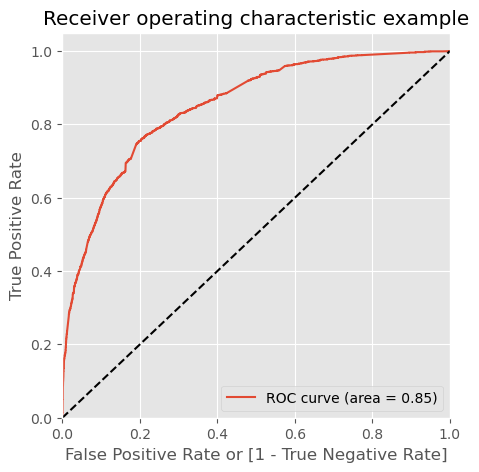

In [146]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_pred)

In [147]:
# Calculating the Area under curve
roc_auc_score_train = roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_pred) 
print(f"roc_auc_score_train = {round(roc_auc_score_train,2)*100}%")

roc_auc_score_train = 85.0%


In [148]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_pred.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_pred,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.200356,0,1,1,1,0,0,0,0,0,0,0
1,0,0.272289,0,1,1,1,0,0,0,0,0,0,0
2,0,0.164932,0,1,1,0,0,0,0,0,0,0,0
3,0,0.717791,1,1,1,1,1,1,1,1,1,0,0
4,0,0.200356,0,1,1,1,0,0,0,0,0,0,0


In [149]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.561843     0.979319     0.304598
0.2          0.2  0.672696     0.919708     0.520490
0.3          0.3  0.752628     0.814680     0.714393
0.4          0.4  0.783704     0.752230     0.803098
0.5          0.5  0.781694     0.617599     0.882809
0.6          0.6  0.769790     0.538524     0.912294
0.7          0.7  0.752010     0.438362     0.945277
0.8          0.8  0.726190     0.324412     0.973763
0.9          0.9  0.681045     0.174777     0.993003


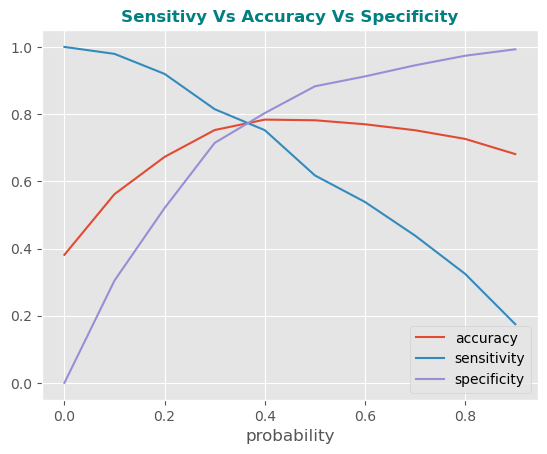

In [150]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.title("Sensitivy Vs Accuracy Vs Specificity",fontdict={"fontsize":12, "fontweight":"bold"},color="teal")
plt.style.use("ggplot")
plt.show()

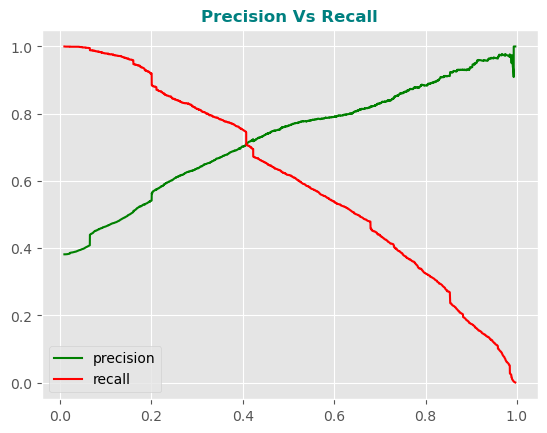

In [151]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_pred)
plt.plot(thresholds, p[:-1], "g-",label = "precision")
plt.plot(thresholds, r[:-1], "r-",label = "recall")
plt.title("Precision Vs Recall",fontdict={"fontsize":12, "fontweight":"bold"},color="teal")
plt.style.use("ggplot")
plt.legend()
plt.show()

In [152]:
# As per the Precision Vs Reacll tradeover, the probability threshold is 0.4
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_pred.map( lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Converted_pred,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.200356,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.272289,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.164932,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.717791,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.200356,0,1,1,1,0,0,0,0,0,0,0,0


In [153]:
# Accuracy level with 0,4 thresold
Accuracy_score_train_final = accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted) 
print(f"Accuracy_score_train_final = {round(Accuracy_score_train_final,2)*100}%")

Accuracy_score_train_final = 78.0%


In [154]:
# Calculating Precision score
Precision_score_train_final = precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted) 
print(f"Precision_score_train_final = {round(Precision_score_train_final,2)*100}%")

Precision_score_train_final = 70.0%


In [155]:
# Calculating recall score
Recall_score_train_final = recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted) 
print(f"Recall_score_train_final = {round(Recall_score_train_final,2)*100}%")

Recall_score_train_final = 75.0%


In [156]:
# Getting confusion matrix
confusion_train = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion_train)

[[3214  788]
 [ 611 1855]]


In [157]:
# Calculating the TP,TN,FP,FN
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

In [158]:
#Calculating the Sensitivity
Sensitivity_train = round(TP/(FN+TP),2)
print(f"Sensitivity_train = {Sensitivity_train*100}%")

Sensitivity_train = 75.0%


In [159]:
#Calculating the Specificity
Specificity_train = round(TN/(TN+FP),2)
Specificity_train
print(f"Specificity_train = {Specificity_train*100}%")

Specificity_train = 80.0%


### Model evaluation on test data

In [160]:
# Checking the X_test
X_test[col].head()

,Do Not Email,Total Time Spent on Website,Page Views Per Visit,API,Direct_Site_Source,Search_referral_Source,Activity_Moderate,"Banking, Investment And Insurance",Finance Management,Healthcare Management,Student,Unemployed,Working Professional
4269,0,16.850000,8.0,1,1,0,1,0,0,0,0,0,0
2376,0,0.000000,0.0,0,0,0,1,0,0,0,0,1,0
7766,0,0.983333,5.0,1,0,1,0,0,0,0,0,0,1
9199,0,0.000000,0.0,1,1,0,0,0,0,0,0,1,0
4359,0,0.000000,0.0,0,0,0,0,0,0,0,0,1,0


In [161]:
# Scaling the X_test dataset
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]= scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [162]:
# Rechecking after scaling
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,API,Landing Page Submission,Direct_Site_Source,Search_referral_Source,Activity_Active,Activity_Moderate,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Student,Unemployed,Working Professional
4269,0,0.031873,0.444982,0.145455,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2376,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7766,0,0.019920,0.025968,0.090909,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
9199,0,0.000000,0.000000,0.000000,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4359,0,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [163]:
# Get the scaled data
X_test_scaled = X_test[col]
X_test_scaled.head()

,Do Not Email,Total Time Spent on Website,Page Views Per Visit,API,Direct_Site_Source,Search_referral_Source,Activity_Moderate,"Banking, Investment And Insurance",Finance Management,Healthcare Management,Student,Unemployed,Working Professional
4269,0,0.444982,0.145455,1,1,0,1,0,0,0,0,0,0
2376,0,0.000000,0.000000,0,0,0,1,0,0,0,0,1,0
7766,0,0.025968,0.090909,1,0,1,0,0,0,0,0,0,1
9199,0,0.000000,0.000000,1,1,0,0,0,0,0,0,1,0
4359,0,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0


In [164]:
# Get the prediction of y_test
y_test_pred = res.predict(sm.add_constant(X_test_scaled))

In [165]:
#Dataframe for test predicted values
y_test_pred_final = pd.DataFrame({"Converted":y_test.values, "Converted_pred": y_test_pred})
y_test_pred_final.head()

,Converted,Converted_pred
4269,1,0.217107
2376,1,0.853187
7766,1,0.629629
9199,0,0.200356
4359,1,0.679324


In [166]:
# Get the prediction for thresold 0.4
y_test_pred_final['predicted'] = y_test_pred_final.Converted_pred.map(lambda x: 1 if x > 0.4 else 0)

In [167]:
# Calculating the Accuracy score
Accuracy_score_test_final = accuracy_score(y_test_pred_final.Converted, y_test_pred_final.predicted) 
print(f"Accuracy_score_test_final = {round(Accuracy_score_test_final,2)*100}%")

Accuracy_score_test_final = 79.0%


In [168]:
#Calculating the Precision score
Precision_score_test_final = precision_score(y_test_pred_final.Converted, y_test_pred_final.predicted) 
print(f"Precision_score_test_final = {round(Precision_score_test_final,2)*100}%")

Precision_score_test_final = 72.0%


In [169]:
#Calculating the recall
Recall_score_test_final = recall_score(y_test_pred_final.Converted, y_test_pred_final.predicted) 
print(f"Recall_score_test_final = {round(Recall_score_test_final,2)*100}%")

Recall_score_test_final = 75.0%


In [170]:
# Getting the confution matrix
confusion_test = confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.predicted)
print(confusion_test)

[[1361  316]
 [ 276  819]]


In [171]:
# Get TP, TN, FP, FN
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [172]:
Sensitivity_test = round(TP/(FN+TP),2)
Sensitivity_test = Sensitivity_test*100
print(f"Sensitivity_test = {Sensitivity_test}%")

Sensitivity_test = 75.0%


In [173]:
Specificity_test = round(TN/(TN+FP),2)
Specificity_test = Specificity_test * 100
print(f"Specificity_test = {Specificity_test}%")

Specificity_test = 81.0%


In [174]:
X_test_final = pd.concat([X_test_ID,y_test_pred_final],axis=1)
X_test_final.head()

,Lead Number,Converted,Converted_pred,predicted
4269,619003,1,0.217107,0
2376,636884,1,0.853187,1
7766,590281,1,0.629629,1
9199,579892,0,0.200356,0
4359,617929,1,0.679324,1


In [175]:
# classification_report(y_test_pred_final.Converted, y_test_pred_final.predicted)
print(f"Classification Report of Train Set : \n\n {classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted)}")
print("\n")
print(f"Classification Report of Test Set : \n\n {classification_report(y_test_pred_final.Converted, y_test_pred_final.predicted)}")

Classification Report of Train Set : 

               precision    recall  f1-score   support

           0       0.84      0.80      0.82      4002
           1       0.70      0.75      0.73      2466

    accuracy                           0.78      6468
   macro avg       0.77      0.78      0.77      6468
weighted avg       0.79      0.78      0.79      6468



Classification Report of Test Set : 

               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1677
           1       0.72      0.75      0.73      1095

    accuracy                           0.79      2772
   macro avg       0.78      0.78      0.78      2772
weighted avg       0.79      0.79      0.79      2772



In [176]:
# Getting the required columns
y_train_pred_final_id = y_train_pred_final[["Converted", "Converted_pred", "predicted"]]
y_train_pred_final_id.head()

,Converted,Converted_pred,predicted
0,0,0.200356,0
1,0,0.272289,0
2,0,0.164932,0
3,0,0.717791,1
4,0,0.200356,0


In [177]:
# X_train_ID = X_train_ID.reset_index()
X_train_ID = X_train_ID.reset_index()
X_train_ID = X_train_ID.drop(columns="index",axis=1)
X_train_ID.head()

,Lead Number
0,641410
1,597687
2,626825
3,587928
4,622366


In [178]:
# Geting the final X_train data
X_train_final = pd.concat([X_train_ID,y_train_pred_final_id],axis=1)
X_train_final.head()

,Lead Number,Converted,Converted_pred,predicted
0,641410,0,0.200356,0
1,597687,0,0.272289,0
2,626825,0,0.164932,0
3,587928,0,0.717791,1
4,622366,0,0.200356,0


In [179]:
# Concate the train and test data set with for lead score
df_final = pd.concat([X_train_final, X_test_final],axis=0)
df_final.shape

(9240, 4)

In [180]:
# Calculate the lead score
df_final["Lead Score"] = round((df_final["Converted_pred"]*100),0)

In [181]:
df_final.tail(100)

,Lead Number,Converted,Converted_pred,predicted,Lead Score
8221,587131,0,0.064985,0,6.0
5467,608064,0,0.680070,1,68.0
1812,641905,1,0.438877,1,44.0
8770,582917,0,0.086528,0,9.0
8139,587671,0,0.198852,0,20.0
4648,615125,1,0.359157,0,36.0
4847,613545,1,0.692575,1,69.0
4013,621477,1,0.422620,1,42.0
6396,600881,0,0.064985,0,6.0
4407,617515,1,0.853187,1,85.0


## Section : 7 
###  Conclusion 

#### Lead Score: 
- The "Lead Score" can serve as a useful tool for ranking and prioritizing leads. You can allocate your resources more efficiently by focusing on leads with higher scores. The lead score generated by a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


The results indicate that the logistic regression model exhibited consistent performance across the training and test datasets. With an accuracy of approximately 78.37% on the training set and 78.64% on the test set, the model demonstrates a balanced ability to classify instances correctly, maintaining its efficacy when encountering new, unseen data.


- Accuracy: The accuracy represents the percentage of correctly classified instances out of the total instances. In our case, the accuracy is around 78.37% for the training set and 78.64% for the test set. These accuracy values are quite similar, indicating that your model is generalizing reasonably well to unseen data.


- Precision: Precision measures the proportion of true positive predictions among all positive predictions made by the model. Higher precision indicates fewer false positives. The model achieved a precision of around 70.19% on the training set and 72.16% on the test set for the positive class. These precision values are acceptable and show that when the model predicts the positive class, it's correct around 70-72% of the time.


- Recall / Sensitivity: Recall (also known as sensitivity) measures the proportion of true positive predictions among all actual positive instances. It's an indicator of how well the model is capturing positive instances. The model achieved a recall of about 75.22% on the training set and 74.79% on the test set for the positive class. These values indicate that the model is capturing around 75% of the actual positive instances.


- Specificity: Specificity measures the proportion of true negative predictions among all actual negative instances. It's an indicator of how well the model is identifying negative instances. The model achieved a specificity of 80.0% on the training set and 81.0% on the test set. These values suggest that the model is good at correctly identifying negative instances.


Overall, your model seems to have balanced performance across various metrics on both the training and test sets. The small differences between the training and test set metrics indicate that your model is not overfitting.





